# Init

In [1]:
%load_ext autoreload
%autoreload 2

import os
%env CUDA_VISIBLE_DEVICES=1
print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))

import torch

# Explicitly set GPU 1
device = torch.device("cuda:0")  # Since CUDA_VISIBLE_DEVICES makes GPU 1 appear as GPU 0
torch.cuda.set_device(device)

# Check which device is being used
print("Current CUDA device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

env: CUDA_VISIBLE_DEVICES=1
CUDA_VISIBLE_DEVICES: 1
Current CUDA device: 0
Device name: NVIDIA RTX A6000


In [2]:
import sys
from pathlib import Path

# Get the parent directory of the notebook (i.e., the 'project/' folder)
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

from embedding_quality import embedding_quality
from plot_embedding import plot_embed, get_scale, add_scale
from analyze_rs import analyze_rs

import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA
import torchvision
import pandas as pd


In [3]:
# Tasic
tasic_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-colors.npy')
tasic_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-pca50.npy')
tasic_ttypes = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/tasic/tasic-ttypes.npy')

tasic_pca2 = tasic_pca50[:, :2]
tasic_pca2_scaled = tasic_pca2 / tasic_pca2[:,0].std()
tasic_pca2_scaled_eval = embedding_quality(tasic_pca2_scaled, tasic_pca50, tasic_ttypes)

In [4]:
# kanton
# data
folder_path = "/gpfs01/berens/data/sharing_files/sdamrich/for_noel/human-409b2"
data_file = f"{folder_path}/human-409b2.data.npy"
labels_file = f"{folder_path}/human-409b2.labels.npy"
pkl_file = f"{folder_path}/human-409b2.pkl"

kanton_pca50 = np.load(data_file)
kanton_labels = np.load(labels_file)

with open(pkl_file, "rb") as f:
    pkl_data = pickle.load(f)

kanton_colors = np.array([pkl_data["label_colors"][i] for i in kanton_labels])

# Print shapes and types
print("Data shape:", kanton_pca50.shape)
print("Labels shape:", kanton_labels.shape)
print("Colors shape:", kanton_colors.shape)
print("Pickle data type:", type(pkl_data))

kanton_pca2 = kanton_pca50[:, :2]
kanton_pca2_scaled = kanton_pca2 / kanton_pca2[:,0].std()
kanton_eval_pca2_scaled = embedding_quality(kanton_pca50, kanton_pca2_scaled, kanton_labels)

Data shape: (20272, 50)
Labels shape: (20272,)
Colors shape: (20272,)
Pickle data type: <class 'dict'>


In [5]:
# genome
# data
genome_data = np.loadtxt('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/gt_sum_thinned.npy')
genome_pca50 = PCA(n_components=50).fit_transform(genome_data)

population_labels = np.loadtxt('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/population_labels.txt', dtype=str)
population_names = pd.read_csv('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/1kgp_population_names.tsv', sep='\t', dtype=str)

# colors
genome_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/Genomes/genome_colors.npy')

genome_pca2 = genome_pca50[:, :2]
genome_pca2_scaled = genome_pca2 / genome_pca2[:,0].std()
genome_eval_pca2_scaled = embedding_quality(genome_pca50, genome_pca2_scaled, population_labels)


In [6]:
# mnist
# load MNIST
mnist_train = torchvision.datasets.MNIST(root='/gpfs01/berens/user/nkury/tsne_pca/data',
                                         train=True,
                                         download=False, 
                                         transform=None)
x_train, y_train = mnist_train.data.float().numpy(), mnist_train.targets

mnist_test = torchvision.datasets.MNIST(root='/gpfs01/berens/user/nkury/tsne_pca/data',
                                        train=False,
                                        download=False, 
                                        transform=None)
x_test, y_test = mnist_test.data.float().numpy(), mnist_test.targets

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

pca = PCA(n_components=50)
mnist_pca50 = pca.fit_transform(x_train)
mnist_labels = y_train

mnist_pca2 = mnist_pca50[:, :2]
mnist_pca2_scaled = mnist_pca2 / mnist_pca2[:,0].std()
mnist_eval_pca2_scaled = embedding_quality(mnist_pca50, mnist_pca2_scaled, mnist_labels)

In [7]:
# retina
retina_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/3000_no_std_pca50.npy')
retina_colors_list = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/clusterColors.npy')
retina_labels = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/retina/labels 1.npy')
retina_colors = retina_colors_list[retina_labels]

retina_pca2 = retina_pca50[:, :2]
retina_pca2_scaled = retina_pca2 / retina_pca2[:,0].std()
retina_eval_pca2_scaled = embedding_quality(retina_pca50, retina_pca2_scaled, retina_labels)

In [8]:
# zebrafish
zfish_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.data.npy')
zfish_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.labels.npy')
zfish_alt_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/zfish/zfish.altlabels.npy')

zfish_pca2 = zfish_pca50[:, :2]
zfish_pca2_scaled = zfish_pca2 / zfish_pca2[:,0].std()
zfish_eval_pca2_scaled = embedding_quality(zfish_pca50, zfish_pca2_scaled, zfish_colors)
zfish_eval_pca2_scaled_alt = embedding_quality(zfish_pca50, zfish_pca2_scaled, zfish_alt_colors)

In [9]:
# c-elegans
c_el_pca50 = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_elegans_50pc.npy')
c_el_labels = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_el_cell_types.npy', allow_pickle=True).astype(str)
c_el_colors = np.load('/gpfs01/berens/user/nkury/tsne_pca/data/c_elegans/c_el_colors.npy')

c_el_pca2 = c_el_pca50[:, :2]
c_el_pca2_scaled = c_el_pca2 / c_el_pca2[:,0].std()
c_el_pca2_scaled_eval = embedding_quality(c_el_pca50, c_el_pca2_scaled, c_el_labels)

In [10]:
# PCA-reg results
with open('results/tasic_results_opentsne_pca_reg.pkl', 'rb') as f:
    tasic_reg_results = pickle.load(f)

with open('results/kanton_results_opentsne_pca_reg.pkl', 'rb') as f:
    kanton_reg_results = pickle.load(f)

with open('results/genome_results_opentsne_pca_reg.pkl', 'rb') as f:
    genome_reg_results = pickle.load(f)

with open('results/mnist_results_opentsne_pca_reg.pkl', 'rb') as f:
    mnist_reg_results = pickle.load(f)

with open('results/retina_results_opentsne_pca_reg.pkl', 'rb') as f:
    retina_reg_results = pickle.load(f)

with open('results/zfish_results_opentsne_pca_reg.pkl', 'rb') as f:
    zfish_reg_results = pickle.load(f)

with open('results/c_elegans_results_opentsne_pca_reg.pkl', 'rb') as f:
    c_el_reg_results = pickle.load(f)

In [11]:
# Other methods results
with open('/gpfs01/berens/user/nkury/tsne_pca/results/tasic_results_om.pkl', 'rb') as f:
    tasic_om_results = pickle.load(f)

with open('/gpfs01/berens/user/nkury/tsne_pca/results/kanton_results_om.pkl', 'rb') as f:
    kanton_om_results = pickle.load(f)

with open('/gpfs01/berens/user/nkury/tsne_pca/results/genome_results_om.pkl', 'rb') as f:
    genome_om_results = pickle.load(f)

with open('/gpfs01/berens/user/nkury/tsne_pca/results/MNIST_results_om.pkl', 'rb') as f:
    mnist_om_results = pickle.load(f)

with open('/gpfs01/berens/user/nkury/tsne_pca/results/retina_results_om.pkl', 'rb') as f:
    retina_om_results = pickle.load(f)

with open('/gpfs01/berens/user/nkury/tsne_pca/results/zfish_results_om.pkl', 'rb') as f:
    zfish_om_results = pickle.load(f)

with open('/gpfs01/berens/user/nkury/tsne_pca/results/c_elegans_results_om.pkl', 'rb') as f:
    c_el_om_results = pickle.load(f)

# Analyze

In [11]:
score_type = 'relative_score'

In [12]:
# tasic
(
    tasic_reg_df_knn_scores,
    tasic_reg_df_cpd_scores,
    tasic_reg_knn_means,
    tasic_reg_knn_stds,
    tasic_reg_cpd_means,
    tasic_reg_cpd_stds,
    tasic_reg_scores,
    tasic_reg_mean_scores,
    tasic_reg_max_mean_scores_idx,
    tasic_reg_max_mean_scores_lambda,
    tasic_reg_max_seed,
    tasic_reg_max_lambda,
    tasic_reg_max_score,
    tasic_reg_best_embedding,
    tasic_reg_best_embedding_eval,
) = analyze_rs(tasic_reg_results, score_type=score_type)

print('Best performing lambda:', tasic_reg_max_lambda)
print('Score:', tasic_reg_max_score)
print('KNN:', tasic_reg_best_embedding_eval[0])
print('CPD:', tasic_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.455801      0.450034     0.435383                    0.417219   
seed_1    0.455575      0.450034     0.435383                    0.417219   
seed_2    0.455575      0.450034     0.435383                    0.417219   
seed_3    0.455575      0.450034     0.435383                    0.417219   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.399106      0.384363                    0.372693   
seed_1    0.399106      0.384363                    0.372693   
seed_2    0.399106      0.384363                    0.372693   
seed_3    0.399106      0.384363                    0.372693   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.357359    0.348208       0.34074  ...   
seed_1                    0.357359    0.348208       0.34074  ...   
seed_2                    0.357359    0.348208       0.34074  ...   
seed_3                    0.357359    0.348208       0.34074  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.054681     0.04882                   0.042708   
seed_1      0.054681     0.04882                   0.042708   
seed_2      0.054681     0.04882                   0.042708   
seed_3      0.054681     0.04882                   0.042708   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.037583       0.03396    0.030757      0.027344   
seed_1                   0.037583       0.03396    0.030757      0.027344   
seed_2                   0.037583       0.03396    0.030757      0.027344   
seed_3                   0.037583       0.03396    0.030757      0.027344   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.024322                   0.021959    0.020468  
seed_1                   0.024322                   0.021959    0.020468  
seed_2                   0.024322                   0.021959    0.020468  
seed_3                   0.024322                   0.021959    0.020468  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.597746      0.708617     0.843832                    0.878173   
seed_1    0.599010      0.708617     0.843832                    0.878173   
seed_2    0.599010      0.708617     0.843832                    0.878173   
seed_3    0.599010      0.708617     0.843832                    0.878173   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.888335      0.891685                    0.896292   
seed_1    0.888335      0.891685                    0.896292   
seed_2    0.888335      0.891685                    0.896292   
seed_3    0.888335      0.891685                    0.896292   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.898576    0.897928       0.89717  ...   
seed_1                    0.898576    0.897928       0.89717  ...   
seed_2                    0.898576    0.897928       0.89717  ...   
seed_3                    0.898576    0.897928       0.89717  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.911785    0.912025                   0.912391   
seed_1      0.911785    0.912025                   0.912391   
seed_2      0.911785    0.912025                   0.912391   
seed_3      0.911785    0.912025                   0.912391   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.912707      0.912779    0.913075      0.913009   
seed_1                   0.912707      0.912779    0.913075      0.913009   
seed_2                   0.912707      0.912779    0.913075      0.913009   
seed_3                   0.912707      0.912779    0.913075      0.913009   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.913318                   0.912933    0.913792  
seed_1                   0.913318                   0.912933    0.913792  
seed_2                   0.913318                   0.912933    0.913792  
seed_3                   0.913318                   0.912933    0.913792  

[4 rows x 41 columns]

Best performing lambda: lambda_0.07500000000000001
Score: 0.8993437398322648
KNN: 0.41721937704642764
CPD: 0.8781729628054165


In [13]:
# kanton
(
    kanton_reg_df_knn_scores,
    kanton_reg_df_cpd_scores,
    kanton_reg_knn_means,
    kanton_reg_knn_stds,
    kanton_reg_cpd_means,
    kanton_reg_cpd_stds,
    kanton_reg_scores,
    kanton_reg_mean_scores,
    kanton_reg_max_mean_scores_idx,
    kanton_reg_max_mean_scores_lambda,
    kanton_reg_max_seed,
    kanton_reg_max_lambda,
    kanton_reg_max_score,
    kanton_reg_best_embedding,
    kanton_reg_best_embedding_eval,
) = analyze_rs(kanton_reg_results, score_type=score_type)

print('Best performing lambda:', kanton_reg_max_lambda)
print('Score:', kanton_reg_max_score)
print('KNN:', kanton_reg_best_embedding_eval[0])
print('CPD:', kanton_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.377077      0.374941     0.369446                    0.362387   
seed_1    0.376579      0.374941     0.369446                    0.362387   
seed_2    0.376579      0.374941     0.369446                    0.362387   
seed_3    0.376579      0.374941     0.369446                    0.362387   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.355436      0.350434                    0.344569   
seed_1    0.355436      0.350434                    0.344569   
seed_2    0.355436      0.350434                    0.344569   
seed_3    0.355436      0.350434                    0.344569   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.340243    0.335625      0.329908  ...   
seed_1                    0.340243    0.335625      0.329908  ...   
seed_2                    0.340243    0.335625      0.329908  ...   
seed_3                    0.340243    0.335625      0.329908  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.056087      0.0493                     0.0445   
seed_1      0.056087      0.0493                     0.0445   
seed_2      0.056087      0.0493                     0.0445   
seed_3      0.056087      0.0493                     0.0445   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.039552      0.035182    0.031807      0.028192   
seed_1                   0.039552      0.035182    0.031807      0.028192   
seed_2                   0.039552      0.035182    0.031807      0.028192   
seed_3                   0.039552      0.035182    0.031807      0.028192   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.025868                   0.023515      0.0224  
seed_1                   0.025868                   0.023515      0.0224  
seed_2                   0.025868                   0.023515      0.0224  
seed_3                   0.025868                   0.023515      0.0224  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.675222      0.746611     0.822431                    0.847055   
seed_1    0.676466      0.746611     0.822431                    0.847055   
seed_2    0.676466      0.746611     0.822431                    0.847055   
seed_3    0.676466      0.746611     0.822431                    0.847055   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.860705      0.863781                    0.869896   
seed_1    0.860705      0.863781                    0.869896   
seed_2    0.860705      0.863781                    0.869896   
seed_3    0.860705      0.863781                    0.869896   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.874181    0.876761      0.879201  ...   
seed_1                    0.874181    0.876761      0.879201  ...   
seed_2                    0.874181    0.876761      0.879201  ...   
seed_3                    0.874181    0.876761      0.879201  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.903842    0.903938                   0.904235   
seed_1      0.903842    0.903938                   0.904235   
seed_2      0.903842    0.903938                   0.904235   
seed_3      0.903842    0.903938                   0.904235   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.904501      0.904612     0.90481       0.90477   
seed_1                   0.904501      0.904612     0.90481       0.90477   
seed_2                   0.904501      0.904612     0.90481       0.90477   
seed_3                   0.904501      0.904612     0.90481       0.90477   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.904935                   0.904873     0.90492  
seed_1                   0.904935                   0.904873     0.90492  
seed_2                   0.904935                   0.904873     0.90492  
seed_3                   0.904935                   0.904873     0.90492  

[4 rows x 41 columns]

Best performing lambda: lambda_0.17500000000000002
Score: 0.8813329691225895
KNN: 0.3402426992896606
CPD: 0.8741807383248628


In [14]:
# genome
(
    genome_reg_df_knn_scores,
    genome_reg_df_cpd_scores,
    genome_reg_knn_means,
    genome_reg_knn_stds,
    genome_reg_cpd_means,
    genome_reg_cpd_stds,
    genome_reg_scores,
    genome_reg_mean_scores,
    genome_reg_max_mean_scores_idx,
    genome_reg_max_mean_scores_lambda,
    genome_reg_max_seed,
    genome_reg_max_lambda,
    genome_reg_max_score,
    genome_reg_best_embedding,
    genome_reg_best_embedding_eval,
) = analyze_rs(genome_reg_results, score_type=score_type)

print('Best performing lambda:', genome_reg_max_lambda)
print('Score:', genome_reg_max_score)
print('KNN:', genome_reg_best_embedding_eval[0])
print('CPD:', genome_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.352696      0.352029     0.352029                    0.351681   
seed_1    0.349101      0.352029     0.352029                    0.351681   
seed_2    0.349101      0.352029     0.352029                    0.351681   
seed_3    0.349101      0.352029     0.352029                    0.351681   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.347159      0.348116                    0.347391   
seed_1    0.347159      0.348116                    0.347391   
seed_2    0.347159      0.348116                    0.347391   
seed_3    0.347159      0.348116                    0.347391   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.340145       0.336      0.336464  ...   
seed_1                    0.340145       0.336      0.336464  ...   
seed_2                    0.340145       0.336      0.336464  ...   
seed_3                    0.340145       0.336      0.336464  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.133072     0.12258                   0.110783   
seed_1      0.133072     0.12258                   0.110783   
seed_2      0.133072     0.12258                   0.110783   
seed_3      0.133072     0.12258                   0.110783   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.100203      0.089159    0.083333      0.075971   
seed_1                   0.100203      0.089159    0.083333      0.075971   
seed_2                   0.100203      0.089159    0.083333      0.075971   
seed_3                   0.100203      0.089159    0.083333      0.075971   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.070203                   0.063681    0.059478  
seed_1                   0.070203                   0.063681    0.059478  
seed_2                   0.070203                   0.063681    0.059478  
seed_3                   0.070203                   0.063681    0.059478  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.567234      0.654146     0.727822                    0.764296   
seed_1    0.569706      0.654146     0.727822                    0.764296   
seed_2    0.569706      0.654146     0.727822                    0.764296   
seed_3    0.569706      0.654146     0.727822                    0.764296   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.775724      0.776064                    0.779002   
seed_1    0.775724      0.776064                    0.779002   
seed_2    0.775724      0.776064                    0.779002   
seed_3    0.775724      0.776064                    0.779002   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.782289    0.784427      0.788708  ...   
seed_1                    0.782289    0.784427      0.788708  ...   
seed_2                    0.782289    0.784427      0.788708  ...   
seed_3                    0.782289    0.784427      0.788708  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.808626    0.808909                   0.809436   
seed_1      0.808626    0.808909                   0.809436   
seed_2      0.808626    0.808909                   0.809436   
seed_3      0.808626    0.808909                   0.809436   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.809554      0.809404    0.809466       0.80937   
seed_1                   0.809554      0.809404    0.809466       0.80937   
seed_2                   0.809554      0.809404    0.809466       0.80937   
seed_3                   0.809554      0.809404    0.809466       0.80937   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.809185                   0.809003    0.808868  
seed_1                   0.809185                   0.809003    0.808868  
seed_2                   0.809185                   0.809003    0.808868  
seed_3                   0.809185                   0.809003    0.808868  

[4 rows x 41 columns]

Best performing lambda: lambda_0.275
Score: 0.9438481767718272
KNN: 0.33110144927536234
CPD: 0.7997506868843244


In [15]:
# mnist
(
    mnist_reg_df_knn_scores,
    mnist_reg_df_cpd_scores,
    mnist_reg_knn_means,
    mnist_reg_knn_stds,
    mnist_reg_cpd_means,
    mnist_reg_cpd_stds,
    mnist_reg_scores,
    mnist_reg_mean_scores,
    mnist_reg_max_mean_scores_idx,
    mnist_reg_max_mean_scores_lambda,
    mnist_reg_max_seed,
    mnist_reg_max_lambda,
    mnist_reg_max_score,
    mnist_reg_best_embedding,
    mnist_reg_best_embedding_eval,
) = analyze_rs(mnist_reg_results, score_type=score_type)

print('Best performing lambda:', mnist_reg_max_lambda)
print('Score:', mnist_reg_max_score)
print('KNN:', mnist_reg_best_embedding_eval[0])
print('CPD:', mnist_reg_best_embedding_eval[2])


KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.391993      0.386205     0.372822                    0.355123   
seed_1    0.392617      0.386205     0.372822                    0.355123   
seed_2    0.392617      0.386205     0.372822                    0.355123   
seed_3    0.392617      0.386205     0.372822                    0.355123   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.341522      0.327115                    0.315255   
seed_1    0.341522      0.327115                    0.315255   
seed_2    0.341522      0.327115                    0.315255   
seed_3    0.341522      0.327115                    0.315255   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.310077    0.301328      0.292127  ...   
seed_1                    0.310077    0.301328      0.292127  ...   
seed_2                    0.310077    0.301328      0.292127  ...   
seed_3                    0.310077    0.301328      0.292127  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0       0.02832    0.024667                   0.021292   
seed_1       0.02832    0.024667                   0.021292   
seed_2       0.02832    0.024667                   0.021292   
seed_3       0.02832    0.024667                   0.021292   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.018498      0.016217    0.014103       0.01225   
seed_1                   0.018498      0.016217    0.014103       0.01225   
seed_2                   0.018498      0.016217    0.014103       0.01225   
seed_3                   0.018498      0.016217    0.014103       0.01225   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.010613                   0.009408    0.009022  
seed_1                   0.010613                   0.009408    0.009022  
seed_2                   0.010613                   0.009408    0.009022  
seed_3                   0.010613                   0.009408    0.009022  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.372256      0.394596     0.410711                    0.425087   
seed_1    0.370252      0.394596     0.410711                    0.425087   
seed_2    0.370252      0.394596     0.410711                    0.425087   
seed_3    0.370252      0.394596     0.410711                    0.425087   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.441276      0.455368                    0.463072   
seed_1    0.441276      0.455368                    0.463072   
seed_2    0.441276      0.455368                    0.463072   
seed_3    0.441276      0.455368                    0.463072   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.473393    0.485382      0.494851  ...   
seed_1                    0.473393    0.485382      0.494851  ...   
seed_2                    0.473393    0.485382      0.494851  ...   
seed_3                    0.473393    0.485382      0.494851  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.570416    0.571158                   0.571291   
seed_1      0.570416    0.571158                   0.571291   
seed_2      0.570416    0.571158                   0.571291   
seed_3      0.570416    0.571158                   0.571291   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.571883      0.572268     0.57238      0.572859   
seed_1                   0.571883      0.572268     0.57238      0.572859   
seed_2                   0.571883      0.572268     0.57238      0.572859   
seed_3                   0.571883      0.572268     0.57238      0.572859   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.572399                   0.573361    0.573495  
seed_1                   0.572399                   0.573361    0.573495  
seed_2                   0.572399                   0.573361    0.573495  
seed_3                   0.572399                   0.573361    0.573495  

[4 rows x 41 columns]

Best performing lambda: lambda_0.30000000000000004
Score: 0.698764231725573
KNN: 0.2639883333333333
CPD: 0.5192779500837849


In [16]:
# retina
(    retina_reg_df_knn_scores,
    retina_reg_df_cpd_scores,
    retina_reg_knn_means,
    retina_reg_knn_stds,
    retina_reg_cpd_means,
    retina_reg_cpd_stds,
    retina_reg_scores,
    retina_reg_mean_scores,
    retina_reg_max_mean_scores_idx,
    retina_reg_max_mean_scores_lambda,
    retina_reg_max_seed,
    retina_reg_max_lambda,
    retina_reg_max_score,
    retina_reg_best_embedding,
    retina_reg_best_embedding_eval,
) = analyze_rs(retina_reg_results, score_type=score_type)

print('Best performing lambda:', retina_reg_max_lambda)
print('Score:', retina_reg_max_score)
print('KNN:', retina_reg_best_embedding_eval[0])
print('CPD:', retina_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.180894      0.177058     0.169559                    0.161683   
seed_1    0.180419      0.177058     0.169559                    0.161683   
seed_2    0.180419      0.177058     0.169559                    0.161683   
seed_3    0.180419      0.177058     0.169559                    0.161683   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.155566      0.149257                    0.145795   
seed_1    0.155566      0.149257                    0.145795   
seed_2    0.155566      0.149257                    0.145795   
seed_3    0.155566      0.149257                    0.145795   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.142651    0.141406      0.139596  ...   
seed_1                    0.142651    0.141406      0.139596  ...   
seed_2                    0.142651    0.141406      0.139596  ...   
seed_3                    0.142651    0.141406      0.139596  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.016676    0.014991                   0.013507   
seed_1      0.016676    0.014991                   0.013507   
seed_2      0.016676    0.014991                   0.013507   
seed_3      0.016676    0.014991                   0.013507   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.012042      0.010956    0.010083      0.009112   
seed_1                   0.012042      0.010956    0.010083      0.009112   
seed_2                   0.012042      0.010956    0.010083      0.009112   
seed_3                   0.012042      0.010956    0.010083      0.009112   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.008483                   0.007958    0.007673  
seed_1                   0.008483                   0.007958    0.007673  
seed_2                   0.008483                   0.007958    0.007673  
seed_3                   0.008483                   0.007958    0.007673  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.671494      0.747843     0.840405                    0.875091   
seed_1    0.679618      0.747843     0.840405                    0.875091   
seed_2    0.679618      0.747843     0.840405                    0.875091   
seed_3    0.679618      0.747843     0.840405                    0.875091   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0     0.88715      0.892337                    0.896064   
seed_1     0.88715      0.892337                    0.896064   
seed_2     0.88715      0.892337                    0.896064   
seed_3     0.88715      0.892337                    0.896064   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.899349    0.902612      0.904755  ...   
seed_1                    0.899349    0.902612      0.904755  ...   
seed_2                    0.899349    0.902612      0.904755  ...   
seed_3                    0.899349    0.902612      0.904755  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.915742    0.915676                   0.915635   
seed_1      0.915742    0.915676                   0.915635   
seed_2      0.915742    0.915676                   0.915635   
seed_3      0.915742    0.915676                   0.915635   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                     0.9156      0.915521    0.915481      0.915351   
seed_1                     0.9156      0.915521    0.915481      0.915351   
seed_2                     0.9156      0.915521    0.915481      0.915351   
seed_3                     0.9156      0.915521    0.915481      0.915351   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                    0.91532                   0.915138    0.914713  
seed_1                    0.91532                   0.915138    0.914713  
seed_2                    0.91532                   0.915138    0.914713  
seed_3                    0.91532                   0.915138    0.914713  

[4 rows x 41 columns]

Best performing lambda: lambda_0.1
Score: 0.866800216586746
KNN: 0.15556597036243527
CPD: 0.8871497957590452


In [17]:
# zfish
(    zfish_reg_df_knn_scores,
    zfish_reg_df_cpd_scores,
    zfish_reg_knn_means,
    zfish_reg_knn_stds,
    zfish_reg_cpd_means,
    zfish_reg_cpd_stds,
    zfish_reg_scores,
    zfish_reg_mean_scores,
    zfish_reg_max_mean_scores_idx,
    zfish_reg_max_mean_scores_lambda,
    zfish_reg_max_seed,
    zfish_reg_max_lambda,
    zfish_reg_max_score,
    zfish_reg_best_embedding,
    zfish_reg_best_embedding_eval,
) = analyze_rs(zfish_reg_results, score_type=score_type)

print('Best performing lambda:', zfish_reg_max_lambda)
print('Score:', zfish_reg_max_score)
print('KNN:', zfish_reg_best_embedding_eval[0])
print('CPD:', zfish_reg_best_embedding_eval[2])


KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.345413      0.339902     0.324185                    0.308768   
seed_1    0.345613      0.339902     0.324185                    0.308768   
seed_2    0.345613      0.339902     0.324185                    0.308768   
seed_3    0.345613      0.339902     0.324185                    0.308768   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.295959      0.285753                     0.27617   
seed_1    0.295959      0.285753                     0.27617   
seed_2    0.295959      0.285753                     0.27617   
seed_3    0.295959      0.285753                     0.27617   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                     0.26923    0.262885      0.256641  ...   
seed_1                     0.26923    0.262885      0.256641  ...   
seed_2                     0.26923    0.262885      0.256641  ...   
seed_3                     0.26923    0.262885      0.256641  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.029056    0.025596                   0.022635   
seed_1      0.029056    0.025596                   0.022635   
seed_2      0.029056    0.025596                   0.022635   
seed_3      0.029056    0.025596                   0.022635   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.020286      0.018061    0.016229      0.014656   
seed_1                   0.020286      0.018061    0.016229      0.014656   
seed_2                   0.020286      0.018061    0.016229      0.014656   
seed_3                   0.020286      0.018061    0.016229      0.014656   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.013431                   0.012803    0.011883  
seed_1                   0.013431                   0.012803    0.011883  
seed_2                   0.013431                   0.012803    0.011883  
seed_3                   0.013431                   0.012803    0.011883  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.607984      0.685651     0.799069                     0.83627   
seed_1    0.609840      0.685651     0.799069                     0.83627   
seed_2    0.609840      0.685651     0.799069                     0.83627   
seed_3    0.609840      0.685651     0.799069                     0.83627   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.846532      0.852287                    0.856244   
seed_1    0.846532      0.852287                    0.856244   
seed_2    0.846532      0.852287                    0.856244   
seed_3    0.846532      0.852287                    0.856244   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.857979    0.857552      0.860022  ...   
seed_1                    0.857979    0.857552      0.860022  ...   
seed_2                    0.857979    0.857552      0.860022  ...   
seed_3                    0.857979    0.857552      0.860022  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.869987    0.869885                   0.869851   
seed_1      0.869987    0.869885                   0.869851   
seed_2      0.869987    0.869885                   0.869851   
seed_3      0.869987    0.869885                   0.869851   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.869747        0.8697    0.869598      0.869487   
seed_1                   0.869747        0.8697    0.869598      0.869487   
seed_2                   0.869747        0.8697    0.869598      0.869487   
seed_3                   0.869747        0.8697    0.869598      0.869487   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.869103                   0.869003    0.868973  
seed_1                   0.869103                   0.869003    0.868973  
seed_2                   0.869103                   0.869003    0.868973  
seed_3                   0.869103                   0.869003    0.868973  

[4 rows x 41 columns]

Best performing lambda: lambda_0.1
Score: 0.8803662903401217
KNN: 0.2959593892649142
CPD: 0.8465323002625571


In [18]:
# c-elegans
(    c_el_reg_df_knn_scores,
    c_el_reg_df_cpd_scores,
    c_el_reg_knn_means,
    c_el_reg_knn_stds,
    c_el_reg_cpd_means,
    c_el_reg_cpd_stds,
    c_el_reg_scores,
    c_el_reg_mean_scores,
    c_el_reg_max_mean_scores_idx,
    c_el_reg_max_mean_scores_lambda,
    c_el_reg_max_seed,
    c_el_reg_max_lambda,
    c_el_reg_max_score,
    c_el_reg_best_embedding,
    c_el_reg_best_embedding_eval,
) = analyze_rs(c_el_reg_results, score_type=score_type)

print('Best performing lambda:', c_el_reg_max_lambda)
print('Score:', c_el_reg_max_score)
print('KNN:', c_el_reg_best_embedding_eval[0])
print('CPD:', c_el_reg_best_embedding_eval[2])

KNN Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.356187      0.348696     0.333213                    0.317411   
seed_1    0.356209      0.348696     0.333213                    0.317411   
seed_2    0.356209      0.348696     0.333213                    0.317411   
seed_3    0.356209      0.348696     0.333213                    0.317411   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.306086      0.297059                    0.290365   
seed_1    0.306086      0.297059                    0.290365   
seed_2    0.306086      0.297059                    0.290365   
seed_3    0.306086      0.297059                    0.290365   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.281693    0.277716      0.270991  ...   
seed_1                    0.281693    0.277716      0.270991  ...   
seed_2                    0.281693    0.277716      0.270991  ...   
seed_3                    0.281693    0.277716      0.270991  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0         0.022    0.019325                   0.017066   
seed_1         0.022    0.019325                   0.017066   
seed_2         0.022    0.019325                   0.017066   
seed_3         0.022    0.019325                   0.017066   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.014995      0.013323    0.011686      0.010388   
seed_1                   0.014995      0.013323    0.011686      0.010388   
seed_2                   0.014995      0.013323    0.011686      0.010388   
seed_3                   0.014995      0.013323    0.011686      0.010388   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.009396                   0.008276    0.007654  
seed_1                   0.009396                   0.008276    0.007654  
seed_2                   0.009396                   0.008276    0.007654  
seed_3                   0.009396                   0.008276    0.007654  

[4 rows x 41 columns]

CPD Scores DataFrame:


lambda_0.0  lambda_0.025  lambda_0.05  lambda_0.07500000000000001  \
seed_0    0.539860      0.598133     0.644688                    0.660082   
seed_1    0.539897      0.598133     0.644688                    0.660082   
seed_2    0.539897      0.598133     0.644688                    0.660082   
seed_3    0.539897      0.598133     0.644688                    0.660082   

        lambda_0.1  lambda_0.125  lambda_0.15000000000000002  \
seed_0    0.668461      0.675371                    0.679861   
seed_1    0.668461      0.675371                    0.679861   
seed_2    0.668461      0.675371                    0.679861   
seed_3    0.668461      0.675371                    0.679861   

        lambda_0.17500000000000002  lambda_0.2  lambda_0.225  ...  \
seed_0                    0.682396    0.685261      0.687667  ...   
seed_1                    0.682396    0.685261      0.687667  ...   
seed_2                    0.682396    0.685261      0.687667  ...   
seed_3                    0.682396    0.685261      0.687667  ...   

        lambda_0.775  lambda_0.8  lambda_0.8250000000000001  \
seed_0      0.705283    0.705365                   0.705513   
seed_1      0.705283    0.705365                   0.705513   
seed_2      0.705283    0.705365                   0.705513   
seed_3      0.705283    0.705365                   0.705513   

        lambda_0.8500000000000001  lambda_0.875  lambda_0.9  lambda_0.925  \
seed_0                   0.705677      0.705731      0.7052      0.705202   
seed_1                   0.705677      0.705731      0.7052      0.705202   
seed_2                   0.705677      0.705731      0.7052      0.705202   
seed_3                   0.705677      0.705731      0.7052      0.705202   

        lambda_0.9500000000000001  lambda_0.9750000000000001  lambda_1.0  
seed_0                   0.705213                   0.704147    0.705408  
seed_1                   0.705213                   0.704147    0.705408  
seed_2                   0.705213                   0.704147    0.705408  
seed_3                   0.705213                   0.704147    0.705408  

[4 rows x 41 columns]

Best performing lambda: lambda_0.15000000000000002
Score: 0.827558874641011
KNN: 0.29036547940109736
CPD: 0.6798606855314789


In [19]:
scores_all_data = np.stack([
    tasic_reg_mean_scores,
    kanton_reg_mean_scores,
    genome_reg_mean_scores,
    mnist_reg_mean_scores,
    retina_reg_mean_scores,
    zfish_reg_mean_scores,
    # c_el_reg_mean_scores,
], axis=0)

avg_scores = np.mean(scores_all_data, axis=0)
max_idx_all_data = np.argmax(avg_scores)

lambda_keys =  zfish_reg_df_cpd_scores.keys()
max_lambda_all_data = lambda_keys[max_idx_all_data]

print("Max lambda across all datasets:", max_lambda_all_data)

Max lambda across all datasets: lambda_0.1


# Plots

## overview all data

/tmp/ipykernel_1634695/376110194.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0,0].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
/tmp/ipykernel_1634695/376110194.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0,0].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.052, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)
/tmp/ipykernel_1634695/376110194.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

Text(0.07, 0.45, '(b)')

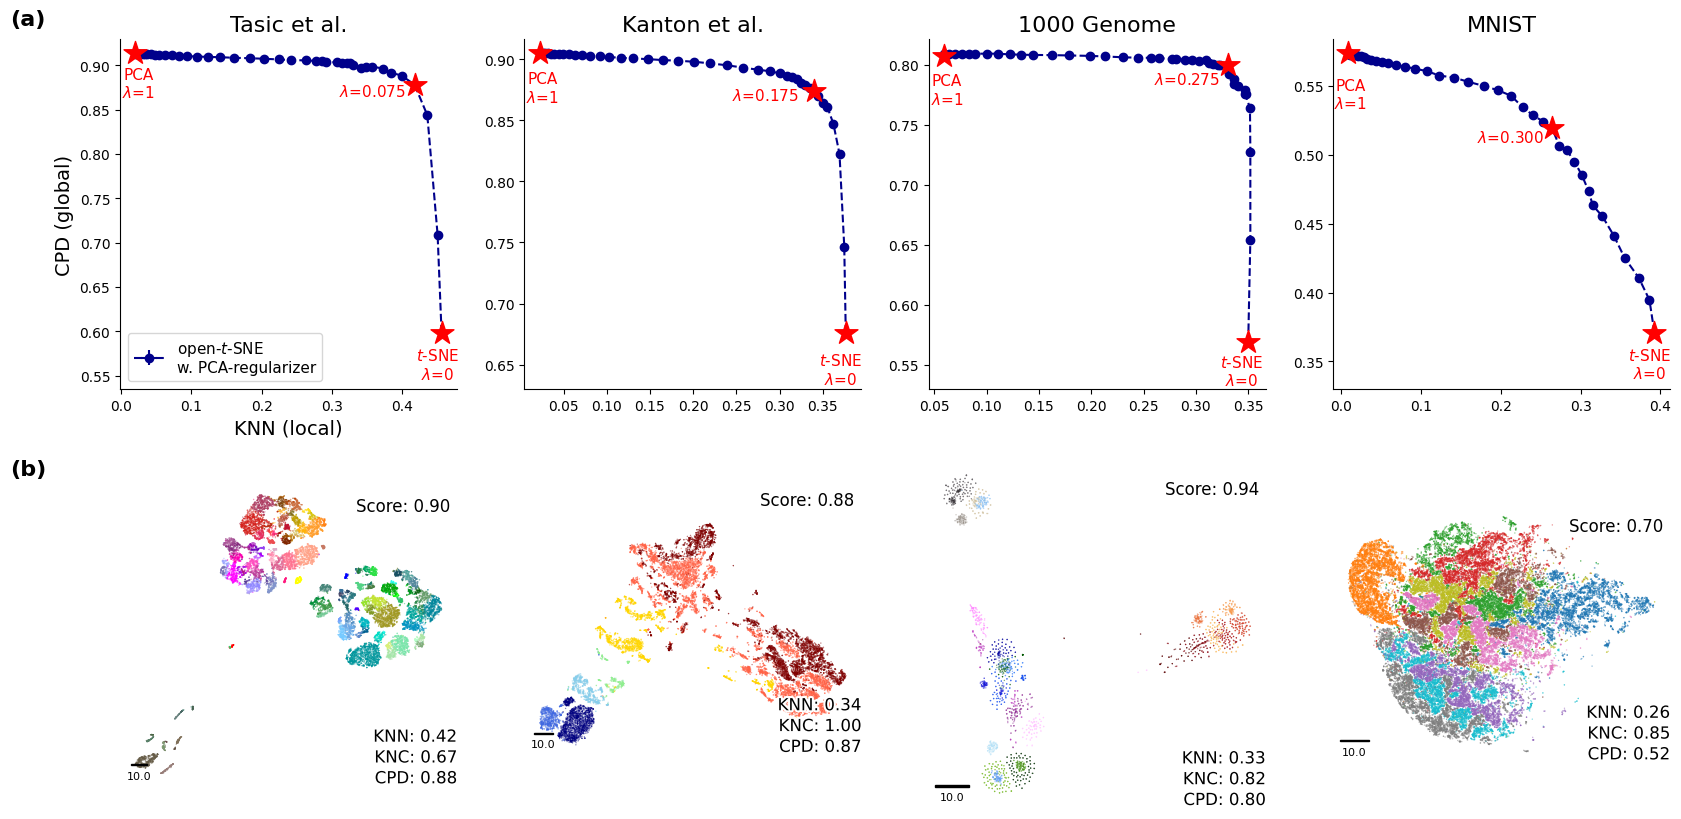

In [20]:
fig, ax  = plt.subplots(2, 4, figsize=(20, 10))

# headers
col_headers = ['Tasic et al.', 'Kanton et al.', '1000 Genome', 'MNIST']

# Tasic

# PCA
ax[0,0].scatter(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,0].text(tasic_pca2_scaled_eval[0] + 0.0045, tasic_pca2_scaled_eval[2] - 0.05, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE 
ax[0,0].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,0].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.052, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,0].scatter(tasic_reg_knn_means[tasic_reg_max_mean_scores_idx], tasic_reg_cpd_means[tasic_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
tasic_reg_max_lam = tasic_reg_max_mean_scores_lambda.split('_')[1]
ax[0,0].text(tasic_reg_knn_means[tasic_reg_max_mean_scores_idx] - 0.06, tasic_reg_cpd_means[tasic_reg_max_mean_scores_idx] - 0.013, f"$\lambda$={float(tasic_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,0].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c='darkblue', label="open-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,0].set_xlabel('KNN (local)', fontsize=14)
ax[0,0].set_ylabel('CPD (global)', fontsize=14)
ax[0,0].set_title('Tasic et al.', fontsize=16)

ax[0,0].legend(fontsize=11, loc='lower left')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,0].set_ylim(0.535)

# Kanton

# PCA
ax[0,1].scatter(kanton_eval_pca2_scaled[0], kanton_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,1].text(kanton_eval_pca2_scaled[0] + 0.003, kanton_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,1].scatter(kanton_reg_knn_means[0], kanton_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,1].text(kanton_reg_knn_means[0] - 0.006, kanton_reg_cpd_means[0] - 0.042, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,1].scatter(kanton_reg_knn_means[kanton_reg_max_mean_scores_idx], kanton_reg_cpd_means[kanton_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
kanton_reg_max_lam = kanton_reg_max_mean_scores_lambda.split('_')[1]
ax[0,1].text(kanton_reg_knn_means[kanton_reg_max_mean_scores_idx] - 0.057, kanton_reg_cpd_means[kanton_reg_max_mean_scores_idx] - 0.008, f"$\lambda$={float(kanton_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,1].errorbar(kanton_reg_knn_means, kanton_reg_cpd_means, xerr=kanton_reg_knn_stds, yerr=kanton_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)

ax[0,1].set_ylim(0.63)
ax[0,1].set_title('Kanton et al.', fontsize=16)

# Genome

# PCA
ax[0,2].scatter(genome_eval_pca2_scaled[0], genome_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,2].text(genome_eval_pca2_scaled[0] + 0.0029, genome_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,2].scatter(genome_reg_knn_means[0], genome_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,2].text(genome_reg_knn_means[0] - 0.006, genome_reg_cpd_means[0] - 0.036, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,2].scatter(genome_reg_knn_means[genome_reg_max_mean_scores_idx], genome_reg_cpd_means[genome_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
genome_reg_max_lam = genome_reg_max_mean_scores_lambda.split('_')[1]
ax[0,2].text(genome_reg_knn_means[genome_reg_max_mean_scores_idx] - 0.04, genome_reg_cpd_means[genome_reg_max_mean_scores_idx] - 0.016, f"$\lambda$={float(genome_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,2].errorbar(genome_reg_knn_means, genome_reg_cpd_means, xerr=genome_reg_knn_stds, yerr=genome_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)

ax[0,2].set_ylim(0.53)
ax[0,2].set_title('1000 Genome', fontsize=16)

# MNIST

# PCA
ax[0,3].scatter(mnist_eval_pca2_scaled[0], mnist_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(mnist_eval_pca2_scaled[0] + 0.0025, mnist_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,3].scatter(mnist_reg_knn_means[0], mnist_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(mnist_reg_knn_means[0] - 0.006, mnist_reg_cpd_means[0] - 0.033, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# # best lambda
ax[0,3].scatter(mnist_reg_knn_means[mnist_reg_max_mean_scores_idx], mnist_reg_cpd_means[mnist_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
mnist_reg_max_lam = mnist_reg_max_mean_scores_lambda.split('_')[1]
ax[0,3].text(mnist_reg_knn_means[mnist_reg_max_mean_scores_idx] - 0.052, mnist_reg_cpd_means[mnist_reg_max_mean_scores_idx] - 0.01, f"$\lambda$={float(mnist_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,3].errorbar(mnist_reg_knn_means, mnist_reg_cpd_means, xerr=mnist_reg_knn_stds, yerr=mnist_reg_cpd_stds, fmt='o--', c='darkblue', label="InfoNC-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)

ax[0,3].set_ylim(0.33)
ax[0,3].set_title('MNIST', fontsize=16)

# Tasic
plot_embed(tasic_reg_best_embedding, tasic_reg_best_embedding_eval, c=tasic_colors, ax=ax[1, 0], eval_size=12, add_scale_plot=True)
ax[1, 0].text(0.7, 0.9, f"Score: {tasic_reg_max_score:.2f}", fontsize=12, transform=ax[1, 0].transAxes)

# Kanton
plot_embed(kanton_reg_best_embedding, kanton_reg_best_embedding_eval, c=kanton_colors, ax=ax[1, 1], eval_size=12, add_scale_plot=True, white_edge=True)
ax[1, 1].text(0.7, 1.03, f"Score: {kanton_reg_max_score:.2f}", fontsize=12, transform=ax[1, 1].transAxes)

# Genome
plot_embed(genome_reg_best_embedding, genome_reg_best_embedding_eval, c=genome_colors, ax=ax[1, 2], eval_size=12, add_scale_plot=True)
ax[1, 2].text(0.7, 0.9, f"Score: {genome_reg_max_score:.2f}", fontsize=12, transform=ax[1, 2].transAxes)

# MNIST
plot_embed(mnist_reg_best_embedding, mnist_reg_best_embedding_eval, c=mnist_labels, ax=ax[1, 3], eval_size=12, add_scale_plot=True)
ax[1, 3].text(0.7, 0.9, f"Score: {mnist_reg_max_score:.2f}", fontsize=12, transform=ax[1, 3].transAxes)

fig.text(0.07, 0.9, '(a)', fontsize=16, fontweight='bold', va='center')
fig.text(0.07, 0.45, '(b)', fontsize=16, fontweight='bold', va='center')

/tmp/ipykernel_1634695/1996526021.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0,0].scatter(retina_reg_knn_means[0], retina_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
/tmp/ipykernel_1634695/1996526021.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0,0].text(retina_reg_knn_means[0], retina_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)
/tmp/ipykernel_1634695/1996526021.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

Text(0.7, 0.9, 'Score: 0.83')

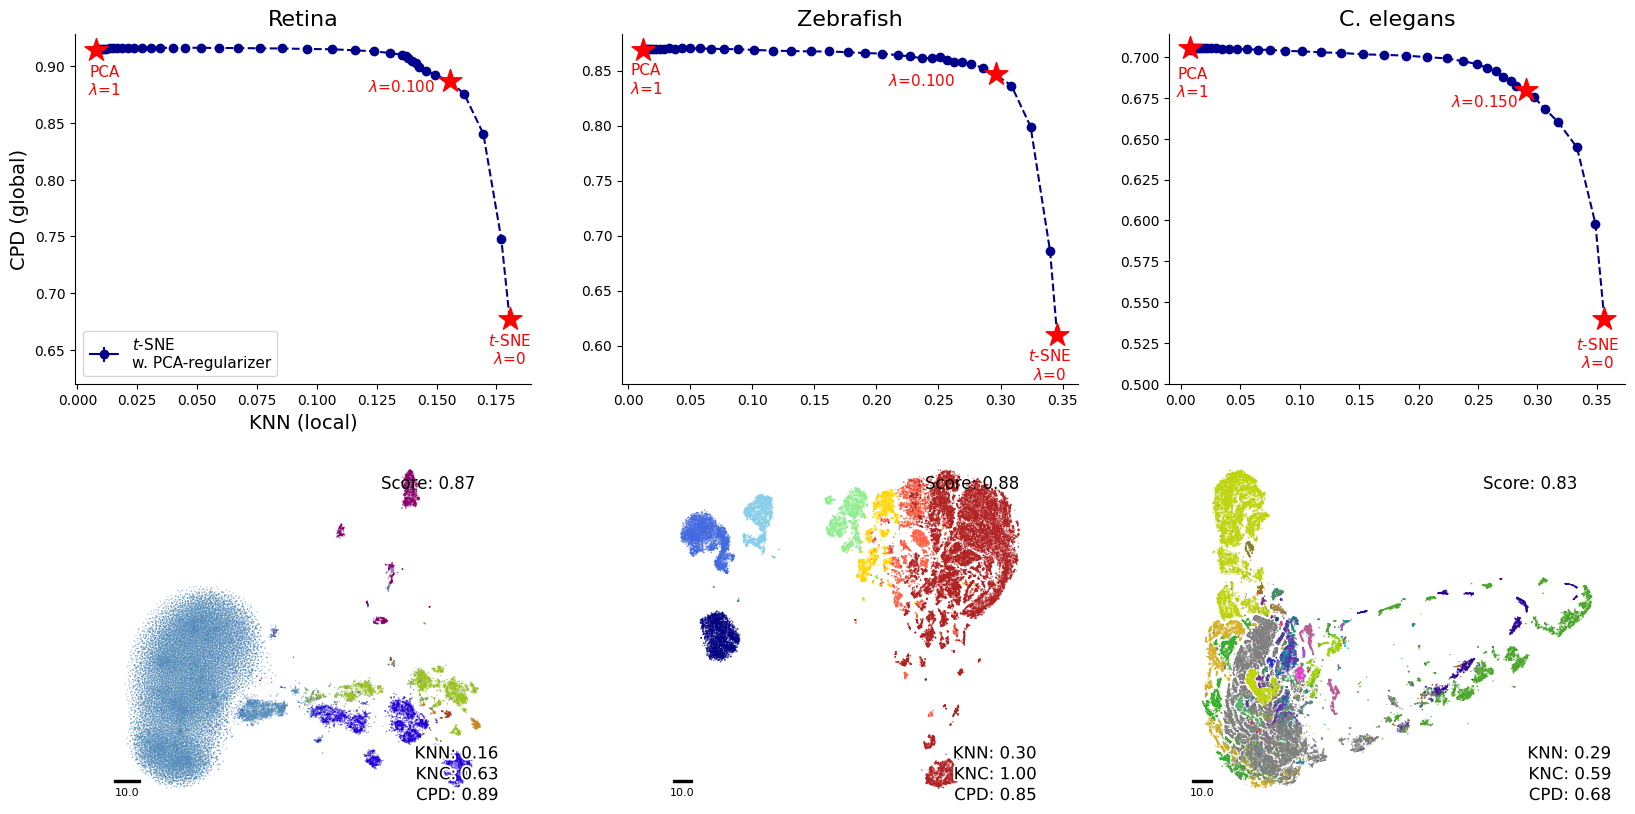

In [33]:
fig, ax  = plt.subplots(2, 3, figsize=(20, 10))

# headers
col_headers = ['Retina', 'Zebrafish', 'C. elegans']

# Retina
# PCA
ax[0,0].scatter(retina_eval_pca2_scaled[0], retina_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,0].text(retina_eval_pca2_scaled[0] + 0.0035, retina_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,0].scatter(retina_reg_knn_means[0], retina_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,0].text(retina_reg_knn_means[0], retina_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,0].scatter(retina_reg_knn_means[retina_reg_max_mean_scores_idx], retina_reg_cpd_means[retina_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
retina_reg_max_lam = retina_reg_max_mean_scores_lambda.split('_')[1]
ax[0,0].text(retina_reg_knn_means[retina_reg_max_mean_scores_idx] - 0.02, retina_reg_cpd_means[retina_reg_max_mean_scores_idx] - 0.01, f"$\lambda$={float(retina_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,0].errorbar(retina_reg_knn_means, retina_reg_cpd_means, xerr=retina_reg_knn_stds, yerr=retina_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[0,0].set_xlabel('KNN (local)', fontsize=14)
ax[0,0].set_ylabel('CPD (global)', fontsize=14)
ax[0,0].set_title('Retina', fontsize=16)
ax[0,0].legend(fontsize=11, loc='lower left')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].set_ylim(0.62)

# Retina
plot_embed(retina_reg_best_embedding, retina_reg_best_embedding_eval, c=retina_colors, ax=ax[1, 0], eval_size=12, add_scale_plot=True)
ax[1, 0].text(0.7, 0.9, f"Score: {retina_reg_max_score:.2f}", fontsize=12, transform=ax[1, 0].transAxes)

# Zebrafish
# PCA
ax[0,1].scatter(zfish_eval_pca2_scaled[0], zfish_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,1].text(zfish_eval_pca2_scaled[0] + 0.0025, zfish_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,1].scatter(zfish_reg_knn_means[0], zfish_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,1].text(zfish_reg_knn_means[0] - 0.006, zfish_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,1].scatter(zfish_reg_knn_means[zfish_reg_max_mean_scores_idx], zfish_reg_cpd_means[zfish_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
zfish_reg_max_lam = zfish_reg_max_mean_scores_lambda.split('_')[1]
ax[0,1].text(zfish_reg_knn_means[zfish_reg_max_mean_scores_idx] - 0.06, zfish_reg_cpd_means[zfish_reg_max_mean_scores_idx] - 0.01, f"$\lambda$={float(zfish_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,1].errorbar(zfish_reg_knn_means, zfish_reg_cpd_means, xerr=zfish_reg_knn_stds, yerr=zfish_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[0,1].set_title('Zebrafish', fontsize=16)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].set_ylim(0.565)

# Zebrafish
plot_embed(zfish_reg_best_embedding, zfish_reg_best_embedding_eval, c=zfish_colors, ax=ax[1, 1], eval_size=12, add_scale_plot=True)
ax[1, 1].text(0.7, 0.9, f"Score: {zfish_reg_max_score:.2f}", fontsize=12, transform=ax[1, 1].transAxes)

# C. elegans
# PCA
ax[0,2].scatter(c_el_pca2_scaled_eval[0], c_el_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,2].text(c_el_pca2_scaled_eval[0] + 0.0025, c_el_pca2_scaled_eval[2] - 0.03, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[0,2].scatter(c_el_reg_knn_means[0], c_el_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,2].text(c_el_reg_knn_means[0] - 0.006, c_el_reg_cpd_means[0] - 0.03, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,2].scatter(c_el_reg_knn_means[c_el_reg_max_mean_scores_idx], c_el_reg_cpd_means[c_el_reg_max_mean_scores_idx], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
c_el_reg_max_lam = c_el_reg_max_mean_scores_lambda.split('_')[1]
ax[0,2].text(c_el_reg_knn_means[c_el_reg_max_mean_scores_idx] - 0.035, c_el_reg_cpd_means[c_el_reg_max_mean_scores_idx] - 0.01, f"$\lambda$={float(c_el_reg_max_lam):.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,2].errorbar(c_el_reg_knn_means, c_el_reg_cpd_means, xerr=c_el_reg_knn_stds, yerr=c_el_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,2].set_title('C. elegans', fontsize=16)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].set_ylim(0.50)

# C. elegans
plot_embed(c_el_reg_best_embedding, c_el_reg_best_embedding_eval, c=c_el_colors, ax=ax[1, 2], eval_size=12, add_scale_plot=True)
ax[1, 2].text(0.7, 0.9, f"Score: {c_el_reg_max_score:.2f}", fontsize=12, transform=ax[1, 2].transAxes)





/tmp/ipykernel_1634695/1641858433.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0,3].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
/tmp/ipykernel_1634695/1641858433.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0,3].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.06, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)
/tmp/ipykernel_1634695/1641858433.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

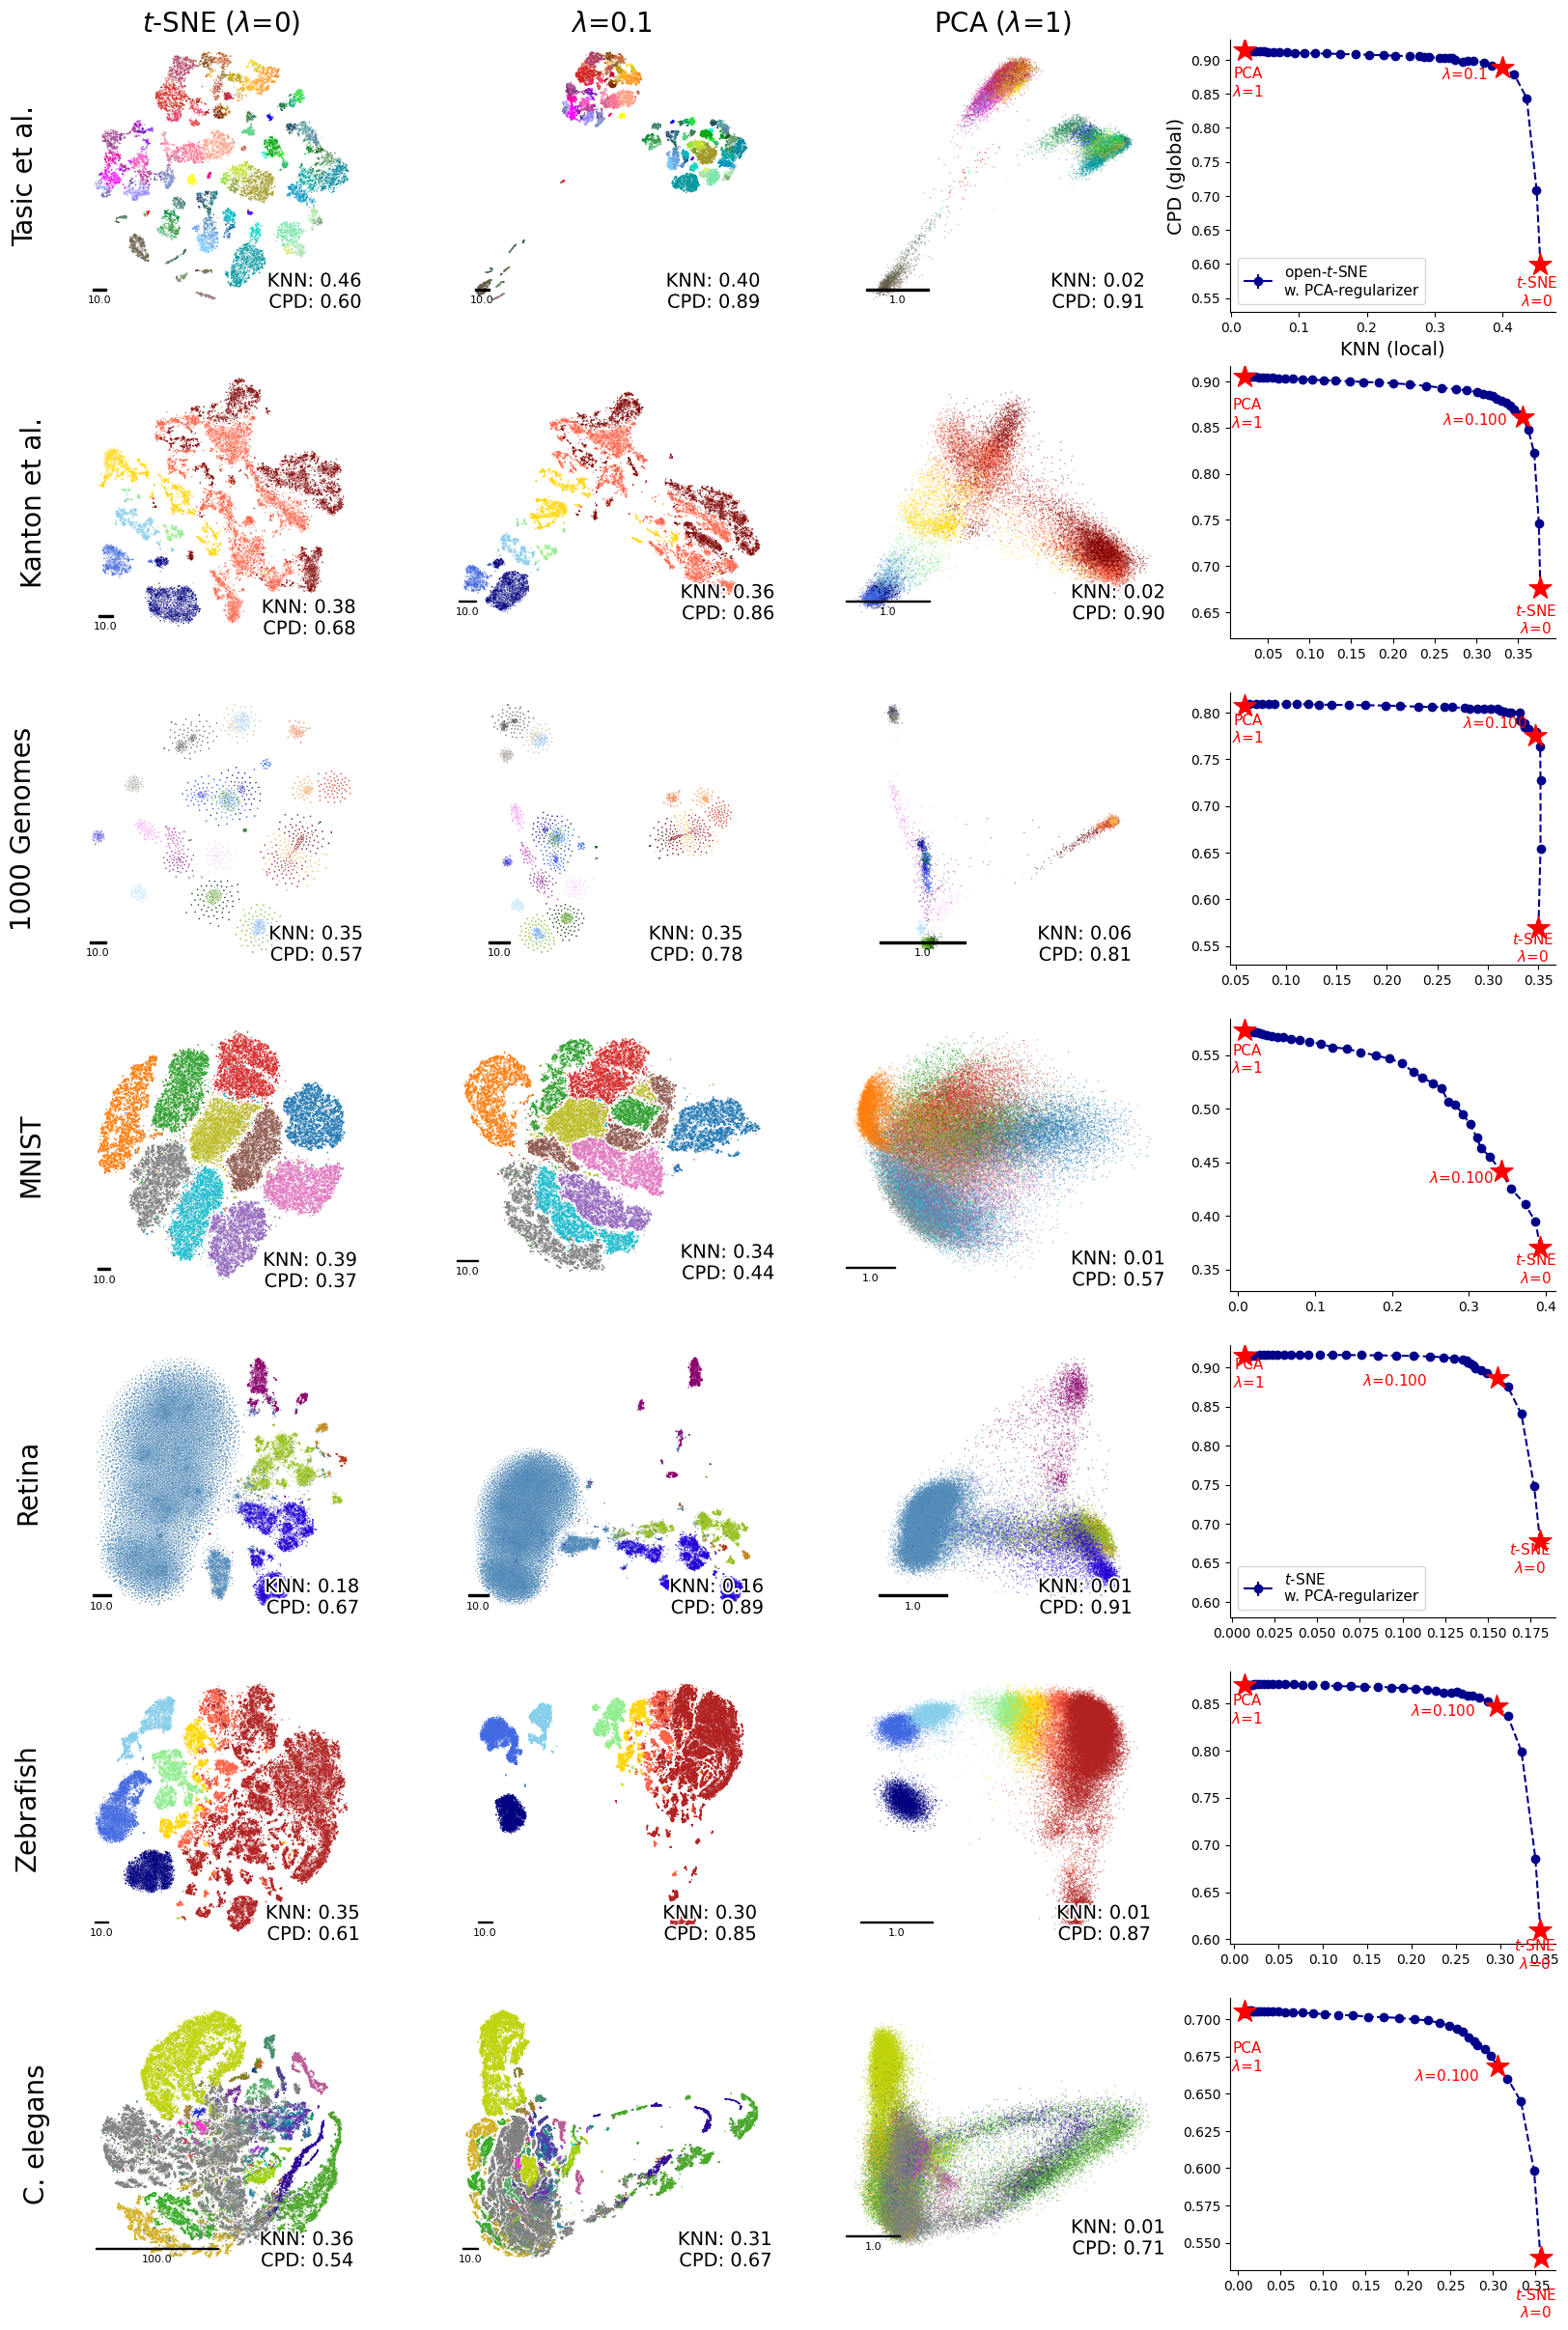

In [ ]:
fig, ax = plt.subplots(7, 4, figsize=(20, 30))

# headers
max_lambda_float = float(max_lambda_all_data.split('_')[1])
col_names = ["$t$-SNE ($\lambda$=0)", f"$\lambda$={max_lambda_float}", "PCA ($\lambda$=1)"]
row_names = ["Tasic et al.", "Kanton et al.", "1000 Genomes", "MNIST", "Retina", "Zebrafish", "C. elegans"]

for i, col_name in enumerate(col_names):
    ax[0, i].set_title(col_name, fontsize=20)

for i, row_name in enumerate(row_names):
    ax[i, 0].text(-0.2, 0.5, row_name, fontsize=20, rotation=90, 
                   ha='center', va='center', transform=ax[i, 0].transAxes)

# Tasic
plot_embed(tasic_reg_results['seed_0']['lambda_0.0']['embedding'], tasic_reg_results['seed_0']['lambda_0.0']['eval'], tasic_colors, ax=ax[0,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(tasic_reg_results['seed_0'][max_lambda_all_data]['embedding'], tasic_reg_results['seed_0'][max_lambda_all_data]['eval'], tasic_colors, ax=ax[0,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[0,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[0,3].scatter(tasic_pca2_scaled_eval[0], tasic_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_pca2_scaled_eval[0] + 0.0045, tasic_pca2_scaled_eval[2] - 0.067, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# t-SNE 
ax[0,3].scatter(tasic_reg_knn_means[0], tasic_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_reg_knn_means[0] - 0.006, tasic_reg_cpd_means[0] - 0.06, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[0,3].scatter(tasic_reg_knn_means[max_idx_all_data], tasic_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[0,3].text(tasic_reg_knn_means[max_idx_all_data] - 0.055, tasic_reg_cpd_means[max_idx_all_data] - 0.017, f"$\lambda$={max_lambda_float:.1f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[0,3].errorbar(tasic_reg_knn_means, tasic_reg_cpd_means, xerr=tasic_reg_knn_stds, yerr=tasic_reg_cpd_stds, fmt='o--', c='darkblue', label="open-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[0,3].set_xlabel('KNN (local)', fontsize=14)
ax[0,3].set_ylabel('CPD (global)', fontsize=14)

ax[0,3].legend(fontsize=11, loc='lower left')
ax[0,3].spines['top'].set_visible(False)
ax[0,3].spines['right'].set_visible(False)

ax[0,3].set_ylim(0.53)

# Kanton
plot_embed(kanton_reg_results['seed_0']['lambda_0.0']['embedding'], kanton_reg_results['seed_0']['lambda_0.0']['eval'], kanton_colors, ax=ax[1,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(kanton_reg_results['seed_0'][max_lambda_all_data]['embedding'], kanton_reg_results['seed_0'][max_lambda_all_data]['eval'], kanton_colors, ax=ax[1,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(kanton_pca2_scaled, kanton_eval_pca2_scaled, kanton_colors, ax=ax[1,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[1,3].scatter(kanton_eval_pca2_scaled[0], kanton_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_eval_pca2_scaled[0] + 0.003, kanton_eval_pca2_scaled[2] - 0.055, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[1,3].scatter(kanton_reg_knn_means[0], kanton_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_reg_knn_means[0] - 0.006, kanton_reg_cpd_means[0] - 0.049, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[1,3].scatter(kanton_reg_knn_means[max_idx_all_data], kanton_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[1,3].text(kanton_reg_knn_means[max_idx_all_data] - 0.048, kanton_reg_cpd_means[max_idx_all_data] - 0.008, f"$\lambda$={max_lambda_float:.1f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[1,3].errorbar(kanton_reg_knn_means, kanton_reg_cpd_means, xerr=kanton_reg_knn_stds, yerr=kanton_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[1,3].spines['top'].set_visible(False)
ax[1,3].spines['right'].set_visible(False)

ax[1,3].set_ylim(0.622)

# Genome
plot_embed(genome_reg_results['seed_0']['lambda_0.0']['embedding'], genome_reg_results['seed_0']['lambda_0.0']['eval'], genome_colors, ax=ax[2,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(genome_reg_results['seed_0'][max_lambda_all_data]['embedding'], genome_reg_results['seed_0'][max_lambda_all_data]['eval'], genome_colors, ax=ax[2,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(genome_pca2_scaled, genome_eval_pca2_scaled, genome_colors, ax=ax[2,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[2,3].scatter(genome_eval_pca2_scaled[0], genome_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_eval_pca2_scaled[0] + 0.0029, genome_eval_pca2_scaled[2] - 0.065, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[2,3].scatter(genome_reg_knn_means[0], genome_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_reg_knn_means[0] - 0.006, genome_reg_cpd_means[0] - 0.065, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[2,3].scatter(genome_reg_knn_means[max_idx_all_data], genome_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[2,3].text(genome_reg_knn_means[max_idx_all_data] - 0.04, genome_reg_cpd_means[genome_reg_max_mean_scores_idx] - 0.016, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[2,3].errorbar(genome_reg_knn_means, genome_reg_cpd_means, xerr=genome_reg_knn_stds, yerr=genome_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[2,3].spines['top'].set_visible(False)
ax[2,3].spines['right'].set_visible(False)

ax[2,3].set_ylim(0.53)

# MNIST
plot_embed(mnist_reg_results['seed_0']['lambda_0.0']['embedding'], mnist_reg_results['seed_0']['lambda_0.0']['eval'], mnist_labels, ax=ax[3,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(mnist_reg_results['seed_0'][max_lambda_all_data]['embedding'], mnist_reg_results['seed_0'][max_lambda_all_data]['eval'], mnist_labels, ax=ax[3,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(mnist_pca2_scaled, mnist_eval_pca2_scaled, mnist_labels, ax=ax[3,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[3,3].scatter(mnist_eval_pca2_scaled[0], mnist_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_eval_pca2_scaled[0] + 0.0025, mnist_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[3,3].scatter(mnist_reg_knn_means[0], mnist_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_reg_knn_means[0] - 0.006, mnist_reg_cpd_means[0] - 0.033, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# # best lambda
ax[3,3].scatter(mnist_reg_knn_means[max_idx_all_data], mnist_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[3,3].text(mnist_reg_knn_means[max_idx_all_data] - 0.052, mnist_reg_cpd_means[max_idx_all_data] - 0.01, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[3,3].errorbar(mnist_reg_knn_means, mnist_reg_cpd_means, xerr=mnist_reg_knn_stds, yerr=mnist_reg_cpd_stds, fmt='o--', c='darkblue', label="InfoNC-$t$-SNE\nw. PCA-regularizer", zorder=5)

ax[3,3].spines['top'].set_visible(False)
ax[3,3].spines['right'].set_visible(False)

ax[3,3].set_ylim(0.33)

# Retina
plot_embed(retina_reg_results['seed_0']['lambda_0.0']['embedding'], retina_reg_results['seed_0']['lambda_0.0']['eval'], retina_colors, ax=ax[4,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(retina_reg_results['seed_0'][max_lambda_all_data]['embedding'], retina_reg_results['seed_0'][max_lambda_all_data]['eval'], retina_colors, ax=ax[4,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(retina_pca2_scaled, retina_eval_pca2_scaled, retina_colors, ax=ax[4,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[4,3].scatter(retina_eval_pca2_scaled[0], retina_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_eval_pca2_scaled[0] + 0.0025, retina_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[4,3].scatter(retina_reg_knn_means[0], retina_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_reg_knn_means[0] - 0.006, retina_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[4,3].scatter(retina_reg_knn_means[max_idx_all_data], retina_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[4,3].text(retina_reg_knn_means[max_idx_all_data] - 0.06, retina_reg_cpd_means[max_idx_all_data] - 0.01, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[4,3].errorbar(retina_reg_knn_means, retina_reg_cpd_means, xerr=retina_reg_knn_stds, yerr=retina_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[4,3].legend(fontsize=11, loc='lower left')
ax[4,3].spines['top'].set_visible(False)
ax[4,3].spines['right'].set_visible(False)
ax[4,3].set_ylim(0.58)

# Zebrafish
plot_embed(zfish_reg_results['seed_0']['lambda_0.0']['embedding'], zfish_reg_results['seed_0']['lambda_0.0']['eval'], zfish_colors, ax=ax[5,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(zfish_reg_results['seed_0'][max_lambda_all_data]['embedding'], zfish_reg_results['seed_0'][max_lambda_all_data]['eval'], zfish_colors, ax=ax[5,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(zfish_pca2_scaled, zfish_eval_pca2_scaled, zfish_colors, ax=ax[5,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[5,3].scatter(zfish_eval_pca2_scaled[0], zfish_eval_pca2_scaled[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_eval_pca2_scaled[0] + 0.0025, zfish_eval_pca2_scaled[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)

# InfoNC-t-SNE
ax[5,3].scatter(zfish_reg_knn_means[0], zfish_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_reg_knn_means[0] - 0.006, zfish_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[5,3].scatter(zfish_reg_knn_means[max_idx_all_data], zfish_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[5,3].text(zfish_reg_knn_means[max_idx_all_data] - 0.06, zfish_reg_cpd_means[max_idx_all_data] - 0.01, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)

# Regularizer
ax[5,3].errorbar(zfish_reg_knn_means, zfish_reg_cpd_means, xerr=zfish_reg_knn_stds, yerr=zfish_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[5,3].spines['top'].set_visible(False)
ax[5,3].spines['right'].set_visible(False)

# C. elegans
plot_embed(c_el_reg_results['seed_0']['lambda_0.0']['embedding'], c_el_reg_results['seed_0']['lambda_0.0']['eval'], c_el_colors, ax=ax[6,0], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(c_el_reg_results['seed_0'][max_lambda_all_data]['embedding'], c_el_reg_results['seed_0'][max_lambda_all_data]['eval'], c_el_colors, ax=ax[6,1], show_KNC=False, add_scale_plot=True, eval_size=14)
plot_embed(c_el_pca2_scaled, c_el_pca2_scaled_eval, c_el_colors, ax=ax[6,2], show_KNC=False, add_scale_plot=True, eval_size=14)

# PCA
ax[6,3].scatter(c_el_pca2_scaled_eval[0], c_el_pca2_scaled_eval[2], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_pca2_scaled_eval[0] + 0.0025, c_el_pca2_scaled_eval[2] - 0.04, "PCA\n$\lambda$=1", ha='center', fontsize=11, c='r', zorder=10)
# InfoNC-t-SNE
ax[6,3].scatter(c_el_reg_knn_means[0], c_el_reg_cpd_means[0], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_reg_knn_means[0] - 0.006, c_el_reg_cpd_means[0] - 0.04, "$t$-SNE\n$\lambda$=0", ha='center', fontsize=11, c='r', zorder=10)

# best lambda
ax[6,3].scatter(c_el_reg_knn_means[max_idx_all_data], c_el_reg_cpd_means[max_idx_all_data], label="_nolegend_", c='r', marker='*', s=300, zorder=10)
ax[6,3].text(c_el_reg_knn_means[max_idx_all_data] - 0.06, c_el_reg_cpd_means[max_idx_all_data] - 0.01, f"$\lambda$={max_lambda_float:.3f}", ha='center', fontsize=11, c='r', zorder=10)
# Regularizer
ax[6,3].errorbar(c_el_reg_knn_means, c_el_reg_cpd_means, xerr=c_el_reg_knn_stds, yerr=c_el_reg_cpd_stds, fmt='o--', c='darkblue', label="$t$-SNE\nw. PCA-regularizer", zorder=5)
ax[6,3].spines['top'].set_visible(False)
ax[6,3].spines['right'].set_visible(False)
# ax[6,3].set_ylim(0.58)


## figure 1

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


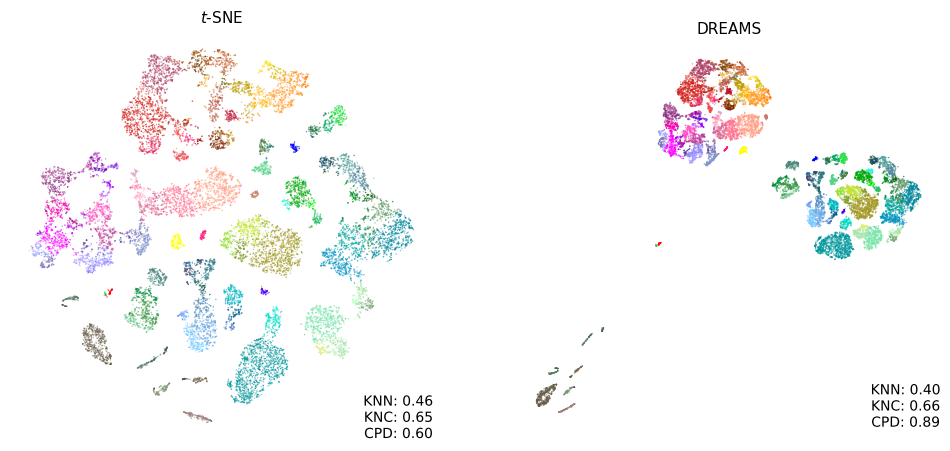

In [13]:
dreams_emb = tasic_reg_results['seed_0']['lambda_0.1']['embedding']
dreams_eval = tasic_reg_results['seed_0']['lambda_0.1']['eval']

tsne_emb = tasic_reg_results['seed_0']['lambda_0.0']['embedding']
tsne_eval = tasic_reg_results['seed_0']['lambda_0.0']['eval']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0], title='$t$-SNE')
plot_embed(dreams_emb, dreams_eval, tasic_colors, ax=ax[1], title='DREAMS')

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


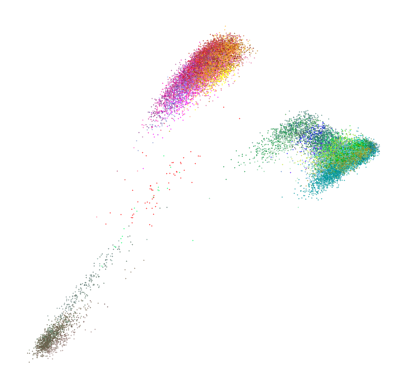

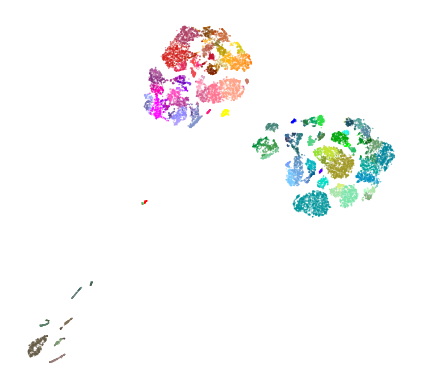

In [78]:
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, show_eval=False)
plot_embed(dreams_emb, dreams_eval, tasic_colors, show_eval=False)

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


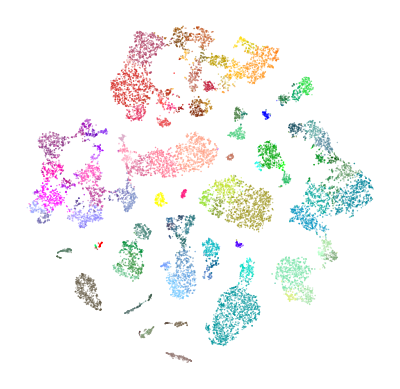

In [58]:
plot_embed(tsne_emb, tsne_eval, tasic_colors,show_eval=False)


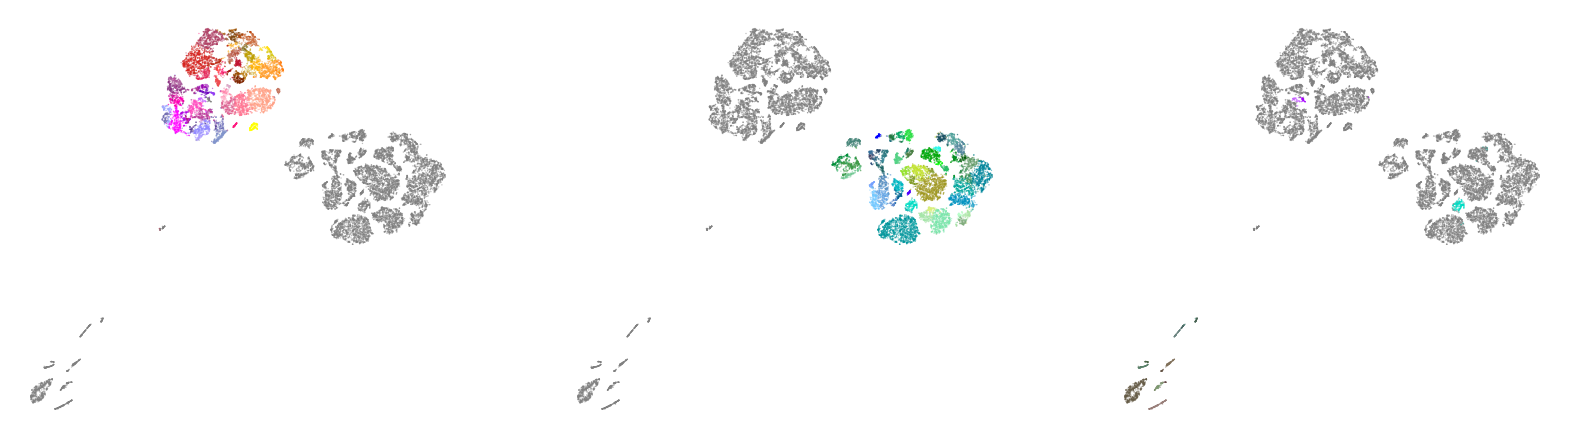

In [59]:
inhibitory_keywords = ['Pvalb', 'Sst', 'Vip', 'Lamp5', 'Sncg']

is_inhibitory = np.array([
    any(keyword in label for keyword in inhibitory_keywords)
    for label in tasic_ttypes
])

excitatory_keywords = [
    'L2/3 IT', 'L4 IT', 'L5 IT', 'L5 NP', 'L5 PT',
    'L6 IT', 'L6 CT', 'L6 NP', 'L6b'
]

is_excitatory = np.array([
    any(keyword in label for keyword in excitatory_keywords)
    for label in tasic_ttypes
])

non_neural_keywords = [
    'Astro', 'Endo', 'Microglia', 'Oligo', 'OPC',
    'Peri', 'SMC', 'PVM', 'VLMC', 'Serpinf1'
]

cols_inhib = []
for i, color in enumerate(tasic_colors):
    if is_inhibitory[i]:
        cols_inhib.append(color)
    else:
        cols_inhib.append('gray')

cols_excit = []
for i, color in enumerate(tasic_colors):
    if is_excitatory[i]:
        cols_excit.append(color)
    else:
        cols_excit.append('gray')

cols_non_neural = []
for i, color in enumerate(tasic_colors):
    if any(keyword in tasic_ttypes[i] for keyword in non_neural_keywords):
        cols_non_neural.append(color)
    else:
        cols_non_neural.append('gray')

# # check if all types are assigned to excitatory, inhibitory, or non-neural
# for i, color in enumerate(tasic_colors):
#     if not (is_inhibitory[i] or is_excitatory[i] or any(keyword in tasic_ttypes[i] for keyword in non_neural_keywords)):
#         print(f"Type {tasic_ttypes[i]} is not assigned to any category.")

fig, ax = plt.subplots(1, 3, figsize=(20, 15))
plot_embed(dreams_emb, dreams_eval, cols_inhib, show_eval=False, ax=ax[0])
plot_embed(dreams_emb, tsne_eval, cols_excit, show_eval=False, ax=ax[1])
plot_embed(dreams_emb, dreams_eval, cols_non_neural, show_eval=False, ax=ax[2])

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


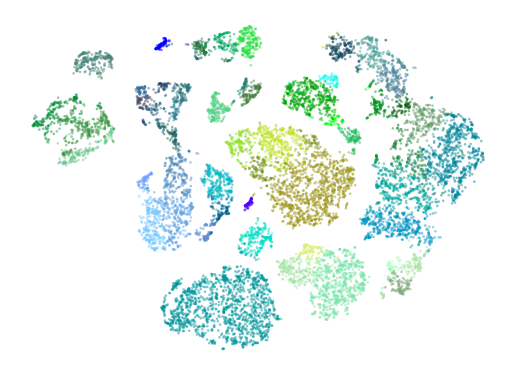

In [21]:
# only excitatory
dreams_o_excit = dreams_emb[is_excitatory]
types_o_excit = tasic_ttypes[is_excitatory]
data_only_excit_eval = np.array([0.0, 0.0, 0.0])  # Dummy eval for excitatory
cols_o_excit = [cols_excit[i] for i in range(len(cols_excit)) if is_excitatory[i]]


plot_embed(dreams_o_excit, data_only_excit_eval, cols_o_excit, show_eval=False, s=3.5)

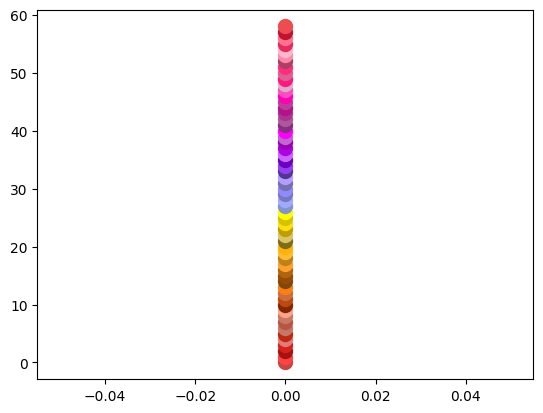

In [60]:
import matplotlib.colors as mcolors
import colorsys

def hex_to_hsv(hex_color):
    rgb = mcolors.to_rgb(hex_color)
    return colorsys.rgb_to_hsv(*rgb)

# Legend handles
cols_inhib_ex = np.unique(cols_inhib)
cols_inhib_ex = cols_inhib_ex[cols_inhib_ex != 'gray']
cols_inhib_ex = sorted(cols_inhib_ex, key=hex_to_hsv)
(col_inhib_0, col_inhib_1, col_inhib_2) = (cols_inhib_ex[len(cols_inhib_ex)//2-5], cols_inhib_ex[-1], cols_inhib_ex[len(cols_inhib_ex)//2])

for i, col in enumerate(cols_inhib_ex):
    plt.scatter([0], [i], c=col, label=f'Inhibitory {i+1}', s=100)

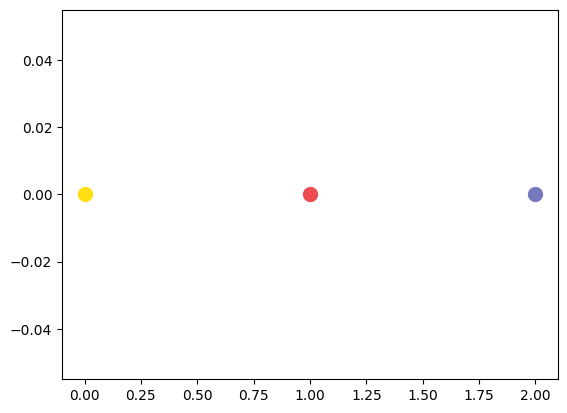

In [61]:
plt.scatter([0], [0], c=col_inhib_0, label='Inhibitory 1', s=100)
plt.scatter([1], [0], c=col_inhib_1, label='Inhibitory 2', s=100)
plt.scatter([2], [0], c=col_inhib_2, label='Inhibitory 3', s=100)

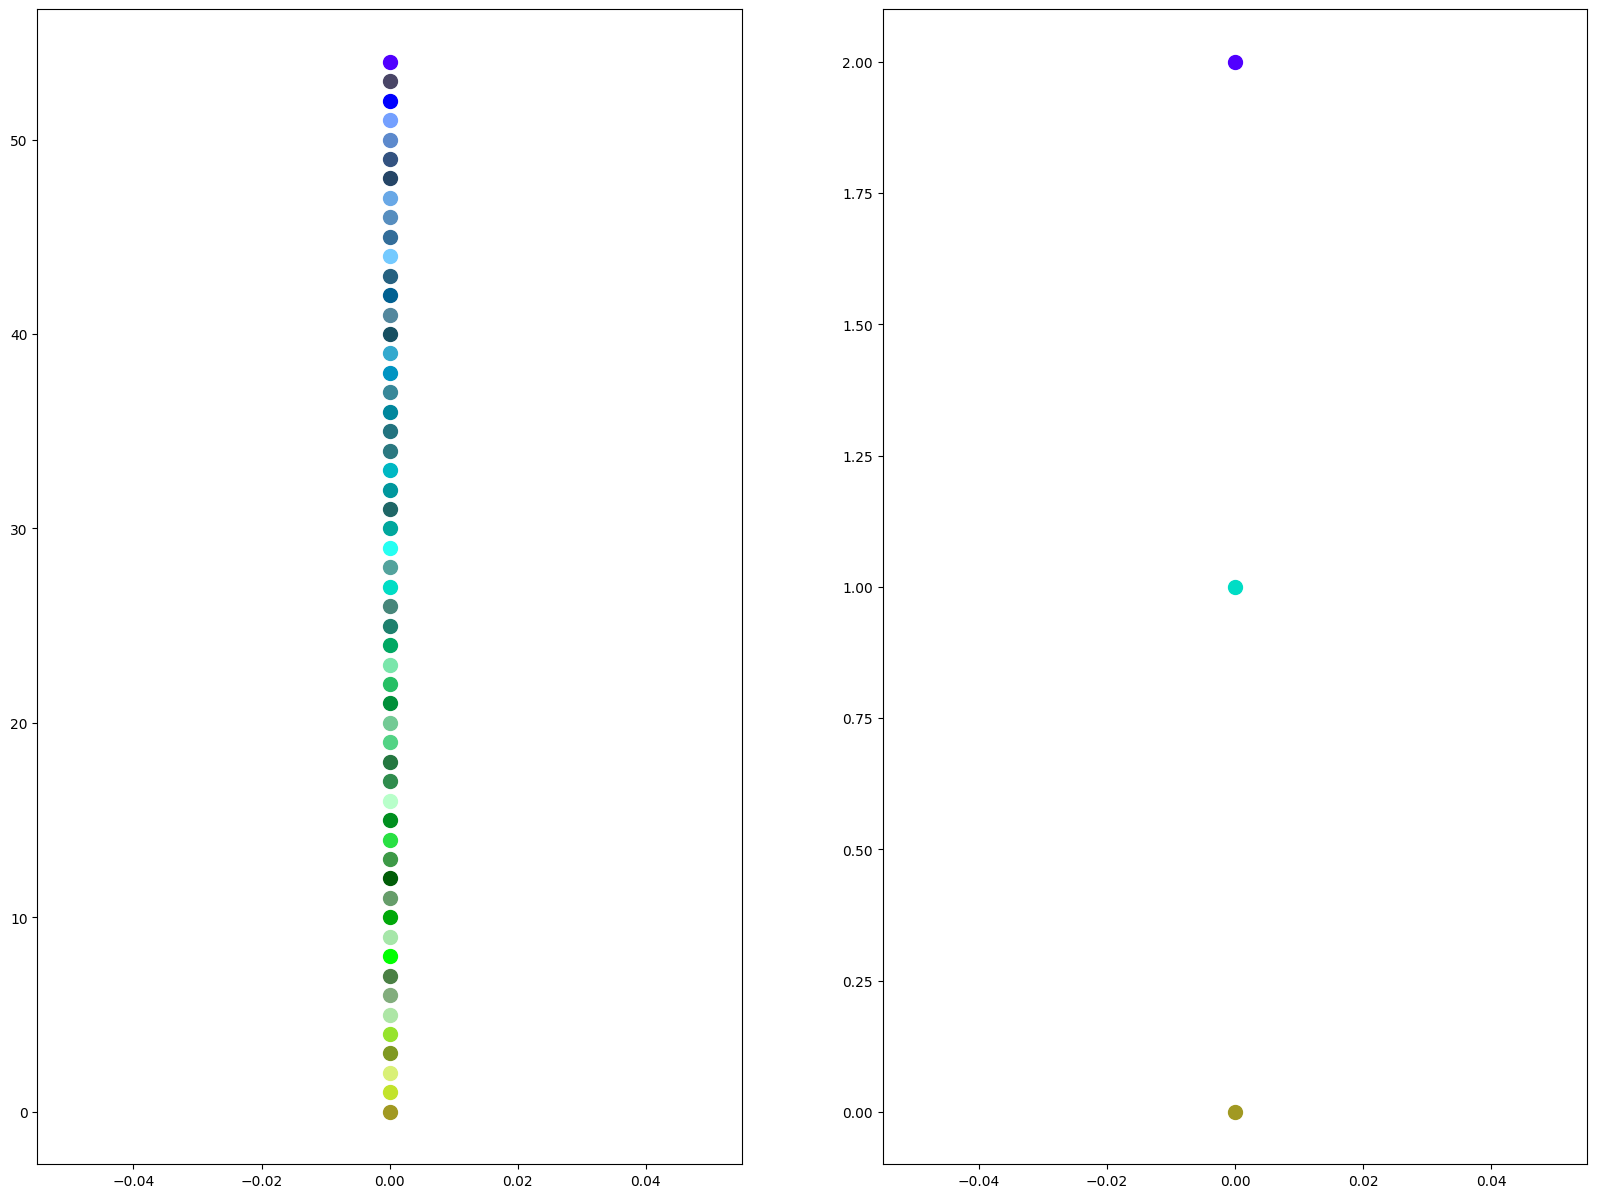

In [62]:
cols_excit_ex = np.unique(cols_excit)
cols_excit_ex = cols_excit_ex[cols_excit_ex != 'gray']
cols_excit_ex = sorted(cols_excit_ex, key=hex_to_hsv)
(col_excit_0, col_excit_1, col_excit_2) = (cols_excit_ex[0], cols_excit_ex[len(cols_excit_ex)//2], cols_excit_ex[-1])

fig, ax = plt.subplots(1, 2, figsize=(20, 15))

for i, col in enumerate(cols_excit_ex):
    ax[0].scatter([0], [i], c=col, label=f'Excitatory {i+1}', s=100)
ax[1].scatter([0], [0], c=col_excit_0, label='Excitatory 1', s=100)
ax[1].scatter([0], [1], c=col_excit_1, label='Excitatory 2', s=100)
ax[1].scatter([0], [2], c=col_excit_2, label='Excitatory 3', s=100)


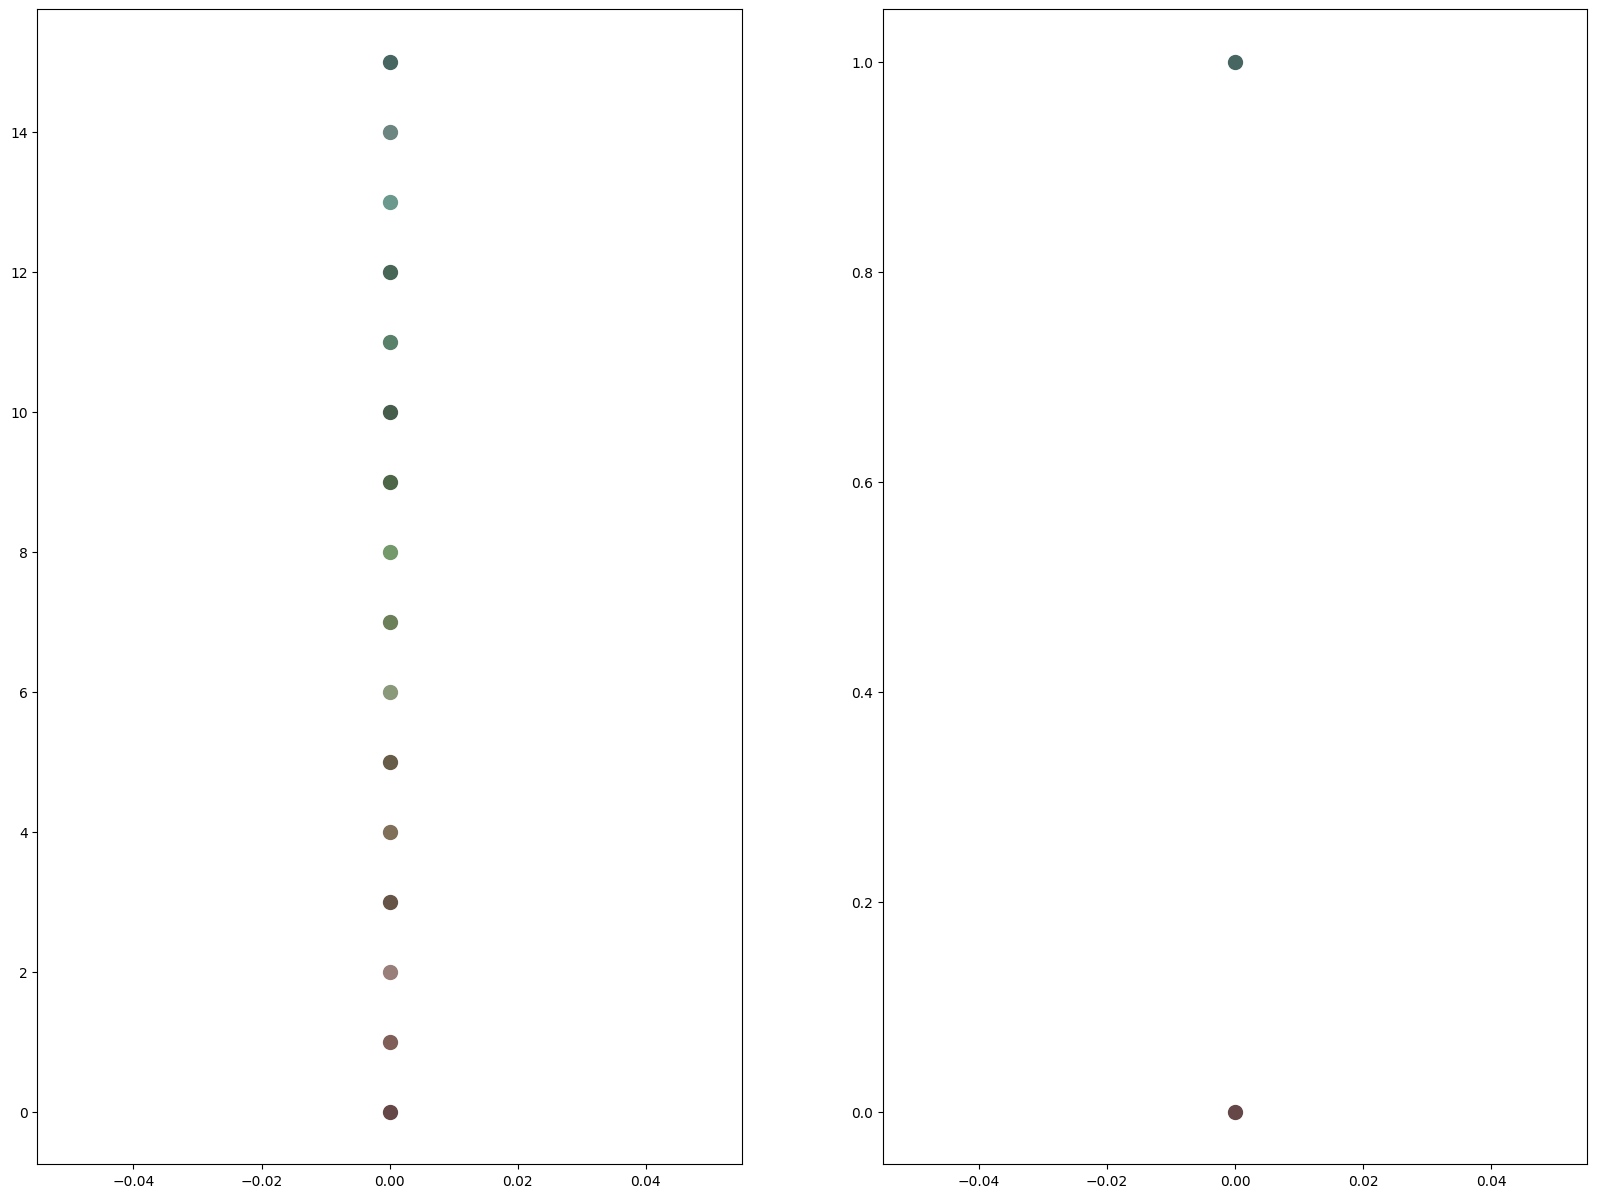

In [63]:

cols_non_neural_ex = np.unique(cols_non_neural)
cols_non_neural_ex = cols_non_neural_ex[cols_non_neural_ex != 'gray']
cols_non_neural_ex = sorted(cols_non_neural_ex, key=hex_to_hsv)
cols_non_neural_ex = cols_non_neural_ex[:-3]
(col_non_neural_0, col_non_neural_1) = (cols_non_neural_ex[0], cols_non_neural_ex[-1])

fig, ax = plt.subplots(1, 2, figsize=(20, 15))
for i, col in enumerate(cols_non_neural_ex):
    ax[0].scatter([0], [i], c=col, label=f'Non-neural {i+1}', s=100)
ax[1].scatter([0], [0], c=col_non_neural_0, label='Non-neural 1', s=100)
ax[1].scatter([0], [1], c=col_non_neural_1, label='Non-neural 2', s=100)

/tmp/ipykernel_1830653/1873027969.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")


(np.float64(-103.97551288361882),
 np.float64(104.90877131463877),
 np.float64(-106.2694345824091),
 np.float64(96.65301257571828))

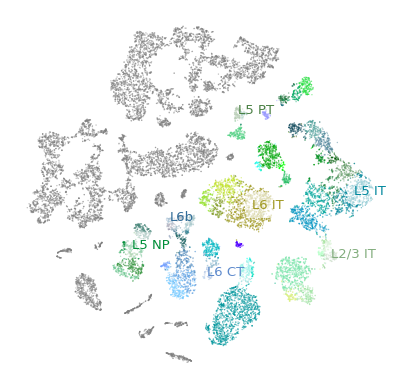

In [ ]:
# t-sne centroids excitatory (reference art of tsne paper)
fig, ax =plt.subplots()
ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

label_centroids = {}
for label in np.unique(tasic_ttypes):
    mask = tasic_ttypes == label
    centroid = tsne_emb[mask].mean(axis=0)
    label_centroids[label] = centroid
    # plt.text(centroid[0], centroid[1], label, fontsize=12, fontweight='bold',
    #         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

classes = {#'Lamp5': [-35, -12, 'Lamp5 Lsp1'],
           #'Vip':   [15, 30, 'Vip Rspo4 Rxfp1 Chat'],
           #'Pvalb': [-4, 32, 'Pvalb Reln Tac1'],
           #'Sst':   [-32, 18, 'Sst Myh8 Fibin'],
           'L2/3 IT': [-30, -30, 'L2/3 IT ALM Sla'],
           'L5 IT': [-10, -25, 'L5 IT ALM Tnc'],
           'L6 IT': [6, -4, 'L6 IT VISp Penk Col27a1'],
           'L5 PT': [23,-25, 'L5 PT ALM Hpgd'],
           'L5 NP': [-23, -40, 'L5 NP VISp Trhr Cpne7'],
           'L6 CT': [30,12, 'L6 CT VISp Nxph2 Wls'],
           'L6b':   [35,-11, 'L6b P2ry12'],
           #'Non-neurons': [20,-20, 'Astro Aqp4']
           } 

labels_long = [elem[2] for elem in classes.values()]
idx_labels = [np.where(tasic_ttypes == name)[0][0] for name in labels_long]
colors_labels = tasic_colors[idx_labels]


for i, (class_name, class_info) in enumerate(classes.items()):
    label_key = class_info[2]  # Extract the cluster name
    if label_key in label_centroids:  # Ensure the key exists in label_centroids
        centroid = label_centroids[label_key]
        ax.text(centroid[0], centroid[1], class_name, fontsize=9.5, c=colors_labels[i], bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.5'))


ax.set_aspect("equal")
ax.axis("off")
# plot_embed(tsne_emb, tsne_eval, cols_excit, show_eval=False)

/tmp/ipykernel_1830653/1938970526.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")


(np.float64(-103.97551288361882),
 np.float64(104.90877131463877),
 np.float64(-106.2694345824091),
 np.float64(96.65301257571828))

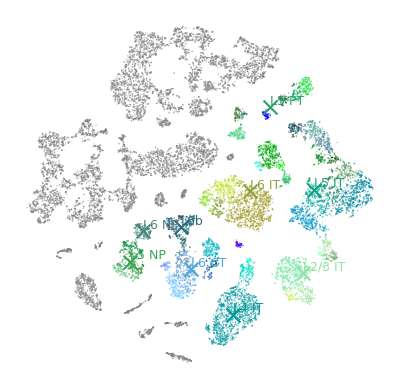

In [23]:
from matplotlib.colors import to_rgb
from matplotlib.colors import to_hex

centroids = {}
mean_colors = {}

for kw in excitatory_keywords:
    # Find indices where the keyword appears in the cell type
    mask = np.array([kw in label for label in tasic_ttypes])
    
    if np.any(mask):  # skip if no cells for this keyword
        # Compute centroid as mean of the embeddings for this group
        centroid = tsne_emb[mask].mean(axis=0)
        centroids[kw] = centroid

        rgb_colors = np.array([to_rgb(c) for c in np.array(tasic_colors)[mask]])
        mean_rgb = rgb_colors.mean(axis=0)
        mean_colors[kw] = mean_rgb

mean_colors_hex = {kw: to_hex(mean_colors[kw]) for kw in mean_colors}

fig, ax = plt.subplots()
ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

# Plot centroids for each keyword
for kw, centroid in centroids.items():
    color = mean_colors_hex[kw]
    ax.scatter(centroid[0], centroid[1], c=color, marker='x', s=100, label=kw)
    ax.text(centroid[0] + 0.01, centroid[1] + 0.01, kw, fontsize=9, ha='left', va='bottom', c=color)

ax.set_aspect("equal")
ax.axis("off")

/tmp/ipykernel_3725605/2487267569.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")


(np.float64(-4.759391513490213),
 np.float64(74.42976924257772),
 np.float64(-44.08746396221086),
 np.float64(12.60271578797099))

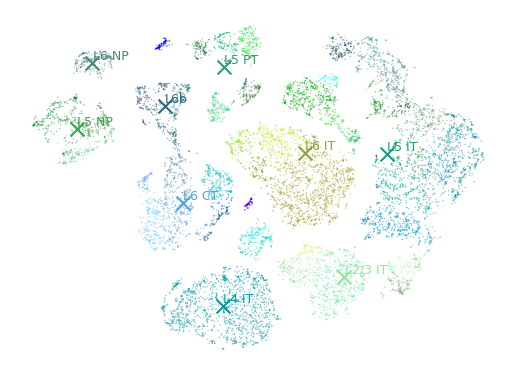

In [25]:
from matplotlib.colors import to_rgb
from matplotlib.colors import to_hex

centroids_o_ex = {}
mean_colors_o_ex = {}

for kw in excitatory_keywords:
    # Find indices where the keyword appears in the cell type
    mask = np.array([kw in label for label in types_o_excit])
    
    if np.any(mask):  # skip if no cells for this keyword
        # Compute centroid as mean of the embeddings for this group
        centroid = dreams_o_excit[mask].mean(axis=0)
        centroids_o_ex[kw] = centroid

        rgb_colors = np.array([to_rgb(c) for c in np.array(cols_o_excit)[mask]])
        mean_rgb = rgb_colors.mean(axis=0)
        mean_colors_o_ex[kw] = mean_rgb

mean_colors_hex = {kw: to_hex(mean_colors_o_ex[kw]) for kw in mean_colors_o_ex}

fig, ax = plt.subplots()
ax.scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

# Plot centroids for each keyword
for kw, centroid in centroids_o_ex.items():
    color = mean_colors_hex[kw]
    ax.scatter(centroid[0], centroid[1], c=color, marker='x', s=100, label=kw)
    ax.text(centroid[0] + 0.01, centroid[1] + 0.01, kw, fontsize=9, ha='left', va='bottom', c=color)

ax.set_aspect("equal")
ax.axis("off")

/tmp/ipykernel_3725605/3386670777.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=3.5, cmap="tab10", edgecolor="none")


(np.float64(-4.759391513490213),
 np.float64(74.42976924257772),
 np.float64(-44.08746396221086),
 np.float64(12.60271578797099))

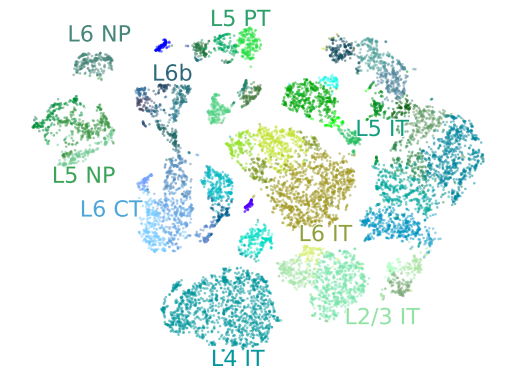

In [57]:
import matplotlib.patheffects as path_effects
path_effects = [
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ]

fig, ax = plt.subplots()
ax.scatter(dreams_o_excit[:, 0], dreams_o_excit[:, 1], c=cols_o_excit, alpha=0.5, s=3.5, cmap="tab10", edgecolor="none")

# Plot centroids for each keyword
font = 16
c1 = centroids_o_ex['L2/3 IT']
ax.text(c1[0], c1[1]-8, 'L2/3 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L2/3 IT'], path_effects=path_effects)
c2 = centroids_o_ex['L4 IT']
ax.text(c2[0]-2, c2[1]-10, 'L4 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L4 IT'], path_effects=path_effects)
c3 = centroids_o_ex['L5 IT']
ax.text(c3[0]-5 , c3[1]+2.5, 'L5 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 IT'], path_effects=path_effects)
c4 = centroids_o_ex['L5 NP']
ax.text(c4[0] -4, c4[1] - 9, 'L5 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 NP'], path_effects=path_effects)
c5 = centroids_o_ex['L5 PT']
ax.text(c5[0]-2.2, c5[1]+6.2, 'L5 PT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L5 PT'], path_effects=path_effects)
c6 = centroids_o_ex['L6 IT']
ax.text(c6[0] - 1, c6[1] - 14.5, 'L6 IT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 IT'], path_effects=path_effects)
c7 = centroids_o_ex['L6 CT']
ax.text(c7[0] - 16.5, c7[1]-2.5, 'L6 CT', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 CT'], path_effects=path_effects)
c8 = centroids_o_ex['L6 NP']
ax.text(c8[0] - 4, c8[1] + 3, 'L6 NP', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6 NP'], path_effects=path_effects)
c9 = centroids_o_ex['L6b']
ax.text(c9[0]-2, c9[1] + 3.7, 'L6b', fontsize=font, ha='left', va='bottom', c=mean_colors_hex['L6b'], path_effects=path_effects)

ax.set_aspect("equal")
ax.axis("off")

In [24]:
centroids

{'L2/3 IT': array([ 56.83056193, -47.85376836]),
 'L4 IT': array([ 18.35264087, -70.97744591]),
 'L5 IT': array([62.66889293, -2.35880086]),
 'L5 NP': array([-38.03303788, -41.860518  ]),
 'L5 PT': array([38.98215204, 42.86149055]),
 'L6 IT': array([27.96435911, -3.31678938]),
 'L6 CT': array([ -4.74875369, -46.00396389]),
 'L6 NP': array([-30.94469652, -25.18659752]),
 'L6b': array([-10.23073337, -22.96319443])}

/tmp/ipykernel_1830653/642653786.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")


(np.float64(-103.97551288361882),
 np.float64(104.90877131463877),
 np.float64(-106.2694345824091),
 np.float64(96.65301257571828))

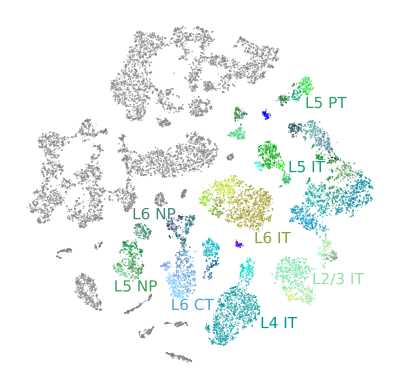

In [76]:
import matplotlib.patheffects as path_effects
path_effects = [
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ]

fig, ax = plt.subplots()
ax.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=cols_excit, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

# Plot centroids for each keyword
c1 = centroids['L2/3 IT']
ax.text(c1[0] + 5, c1[1]-8, 'L2/3 IT', fontsize=11, ha='left', va='bottom', c=mean_colors_hex['L2/3 IT'], path_effects=path_effects)
c2 = centroids['L4 IT']
ax.text(c2[0] + 15, c2[1]-9, 'L4 IT', fontsize=11, ha='left', va='bottom', c=mean_colors_hex['L4 IT'], path_effects=path_effects)
c3 = centroids['L5 IT']
ax.text(c3[0]-14 , c3[1]+8, 'L5 IT', fontsize=11, ha='left', va='bottom', c=mean_colors_hex['L5 IT'], path_effects=path_effects)
c4 = centroids['L5 NP']
ax.text(c4[0] -9, c4[1] -18, 'L5 NP', fontsize=11, ha='left', va='bottom', c=mean_colors_hex['L5 NP'], path_effects=path_effects)
c5 = centroids['L5 PT']
ax.text(c5[0] + 19, c5[1]-2, 'L5 PT', fontsize=11, ha='left', va='bottom', c=mean_colors_hex['L5 PT'], path_effects=path_effects)
c6 = centroids['L6 IT']
ax.text(c6[0] + 2, c6[1] - 30, 'L6 IT', fontsize=11, ha='left', va='bottom', c=mean_colors_hex['L6 IT'], path_effects=path_effects)
c7 = centroids['L6 CT']
ax.text(c7[0] - 11, c7[1] -24, 'L6 CT', fontsize=11, ha='left', va='bottom', c=mean_colors_hex['L6 CT'], path_effects=path_effects)
c8 = centroids['L6 NP']
ax.text(c8[0] - 6, c8[1] + 5, 'L6 NP', fontsize=11, ha='left', va='bottom', c=mean_colors_hex['L6 NP'], path_effects=path_effects)
c9 = centroids['L6b']
ax.text(c9[0], c9[1] + 7, 'L6b', fontsize=1, ha='left', va='bottom', c=mean_colors_hex['L6b'], path_effects=path_effects)

ax.set_aspect("equal")
ax.axis("off")

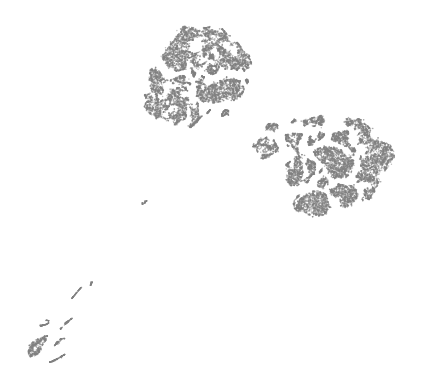

In [18]:
test_col = []
for i, type in enumerate(tasic_ttypes):
    if type == 'Sncg':
        test_col.append('red')
    #elif type == 'CR Lhx5':
        #test_col.append('blue')
    else:
        test_col.append('gray')

plot_embed(dreams_emb, dreams_eval, test_col, show_eval=False)

In [18]:
np.unique(tasic_ttypes)

array(['Astro Aqp4', 'CR Lhx5', 'Endo Ctla2a', 'Endo Cytl1',
       'L2/3 IT ALM Macc1 Lrg1', 'L2/3 IT ALM Ptrf', 'L2/3 IT ALM Sla',
       'L2/3 IT VISp Adamts2', 'L2/3 IT VISp Agmat', 'L2/3 IT VISp Rrad',
       'L4 IT VISp Rspo1', 'L5 IT ALM Cbln4 Fezf2',
       'L5 IT ALM Cpa6 Gpr88', 'L5 IT ALM Gkn1 Pcdh19',
       'L5 IT ALM Lypd1 Gpr88', 'L5 IT ALM Npw', 'L5 IT ALM Pld5',
       'L5 IT ALM Tmem163 Arhgap25', 'L5 IT ALM Tmem163 Dmrtb1',
       'L5 IT ALM Tnc', 'L5 IT VISp Batf3', 'L5 IT VISp Col27a1',
       'L5 IT VISp Col6a1 Fezf2', 'L5 IT VISp Hsd11b1 Endou',
       'L5 IT VISp Whrn Tox2', 'L5 NP ALM Trhr Nefl',
       'L5 NP VISp Trhr Cpne7', 'L5 NP VISp Trhr Met', 'L5 PT ALM Hpgd',
       'L5 PT ALM Npsr1', 'L5 PT ALM Slco2a1', 'L5 PT VISp C1ql2 Cdh13',
       'L5 PT VISp C1ql2 Ptgfr', 'L5 PT VISp Chrna6', 'L5 PT VISp Krt80',
       'L5 PT VISp Lgr5', 'L6 CT ALM Cpa6', 'L6 CT ALM Nxph2 Sla',
       'L6 CT VISp Ctxn3 Brinp3', 'L6 CT VISp Ctxn3 Sla',
       'L6 CT VISp Gpr139'

## figure 2

In [64]:
tasic_umap_results = tasic_om_results['umap']
tasic_umap_emb = tasic_umap_results['seed_3']['embedding']
tasic_umap_eval = tasic_umap_results['seed_3']['eval']

tasic_phate_results = tasic_om_results['phate']
tasic_phate_emb = tasic_phate_results['seed_3']['embedding']
tasic_phate_eval = tasic_phate_results['seed_3']['eval']

tasic_starmap_results = tasic_om_results['star_map']
tasic_starmap_emb = tasic_starmap_results['seed_3']['embedding']
tasic_starmap_eval = tasic_starmap_results['seed_3']['eval']

tasic_mds_hybrid_results = tasic_om_results['squad_mds_hybrid']
tasic_mds_hybrid_emb = tasic_mds_hybrid_results['seed_3']['embedding']
tasic_mds_hybrid_eval = tasic_mds_hybrid_results['seed_3']['eval']

In [65]:
tsne_emb = tasic_reg_results['seed_0']['lambda_0.0']['embedding']
tsne_eval = tasic_reg_results['seed_0']['lambda_0.0']['eval']

tasic_dreams_0025 = tasic_reg_results['seed_0']['lambda_0.025']['embedding']
tasic_dreams_0025_eval = tasic_reg_results['seed_0']['lambda_0.025']['eval']

tasic_dreams_005 = tasic_reg_results['seed_0']['lambda_0.05']['embedding']
tasic_dreams_005_eval = tasic_reg_results['seed_0']['lambda_0.05']['eval']

tasic_dreams_0075 = tasic_reg_results['seed_0']['lambda_0.07500000000000001']['embedding']
tasic_dreams_0075_eval = tasic_reg_results['seed_0']['lambda_0.07500000000000001']['eval']

tasic_dreams_01 = tasic_reg_results['seed_0']['lambda_0.1']['embedding']
tasic_dreams_01_eval = tasic_reg_results['seed_0']['lambda_0.1']['eval']

tasic_dreams_02 = tasic_reg_results['seed_0']['lambda_0.2']['embedding']
tasic_dreams_02_eval = tasic_reg_results['seed_0']['lambda_0.2']['eval']

tasic_dreams_05 = tasic_reg_results['seed_0']['lambda_0.5']['embedding']
tasic_dreams_05_eval = tasic_reg_results['seed_0']['lambda_0.5']['eval']

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


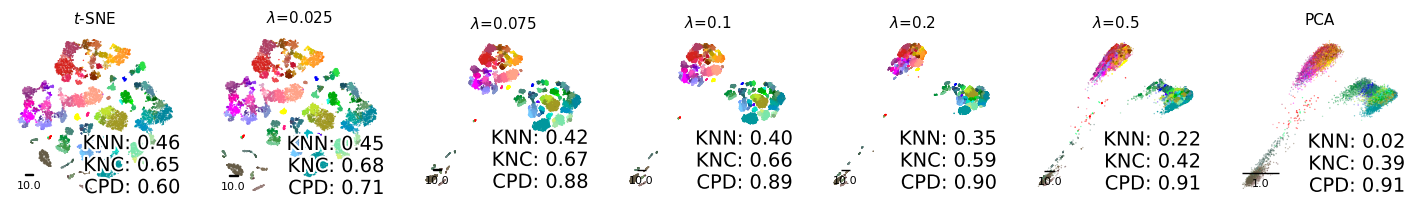

In [25]:
fig, ax = plt.subplots(1, 7, figsize=(18, 12))

plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0], title='$t$-SNE', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_0025, tasic_dreams_0025_eval, tasic_colors, ax=ax[1], title='$\lambda$=0.025', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_0075, tasic_dreams_0075_eval, tasic_colors, ax=ax[2], title='$\lambda$=0.075', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=ax[3], title='$\lambda$=0.1', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=ax[4], title='$\lambda$=0.2', add_scale_plot=True, eval_size=14)
plot_embed(tasic_dreams_05, tasic_dreams_05_eval, tasic_colors, ax=ax[5], title='$\lambda$=0.5', add_scale_plot=True, eval_size=14)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[6], title='PCA', add_scale_plot=True, eval_size=14)

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


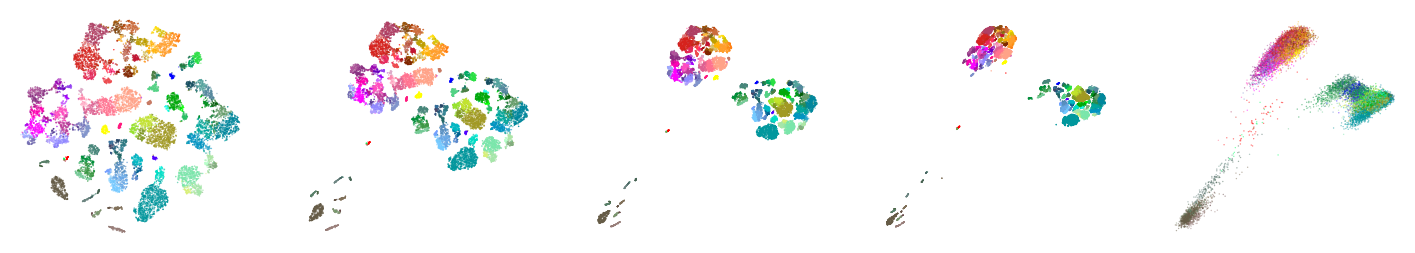

In [31]:
fig, ax = plt.subplots(1, 5, figsize=(18, 12))

eval_size = 14
title_size = 16
plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0], eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_005, tasic_dreams_005_eval, tasic_colors, ax=ax[1], eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=ax[2],  eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=ax[3],  eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[4],  eval_size=eval_size, title_size=title_size, show_eval=False)


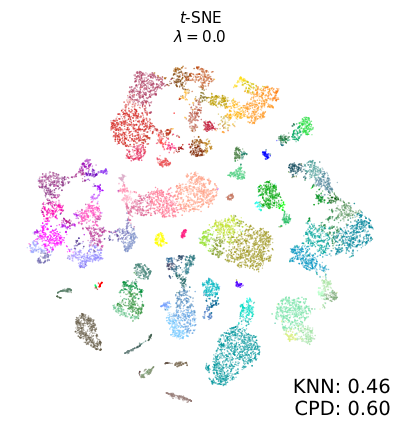

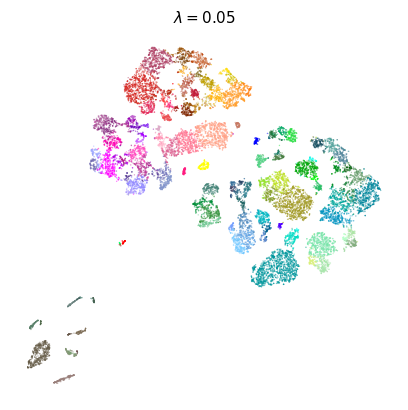

In [28]:
plot_embed(tsne_emb, tsne_eval, tasic_colors, title='$t$-SNE\n$\lambda=0.0$', add_scale_plot=False, eval_size=14, show_KNC=False)
plot_embed(tasic_dreams_005, tasic_dreams_0075_eval, tasic_colors, title='$\lambda=0.05$', add_scale_plot=False, eval_size=14, show_KNC=False, show_eval=False)



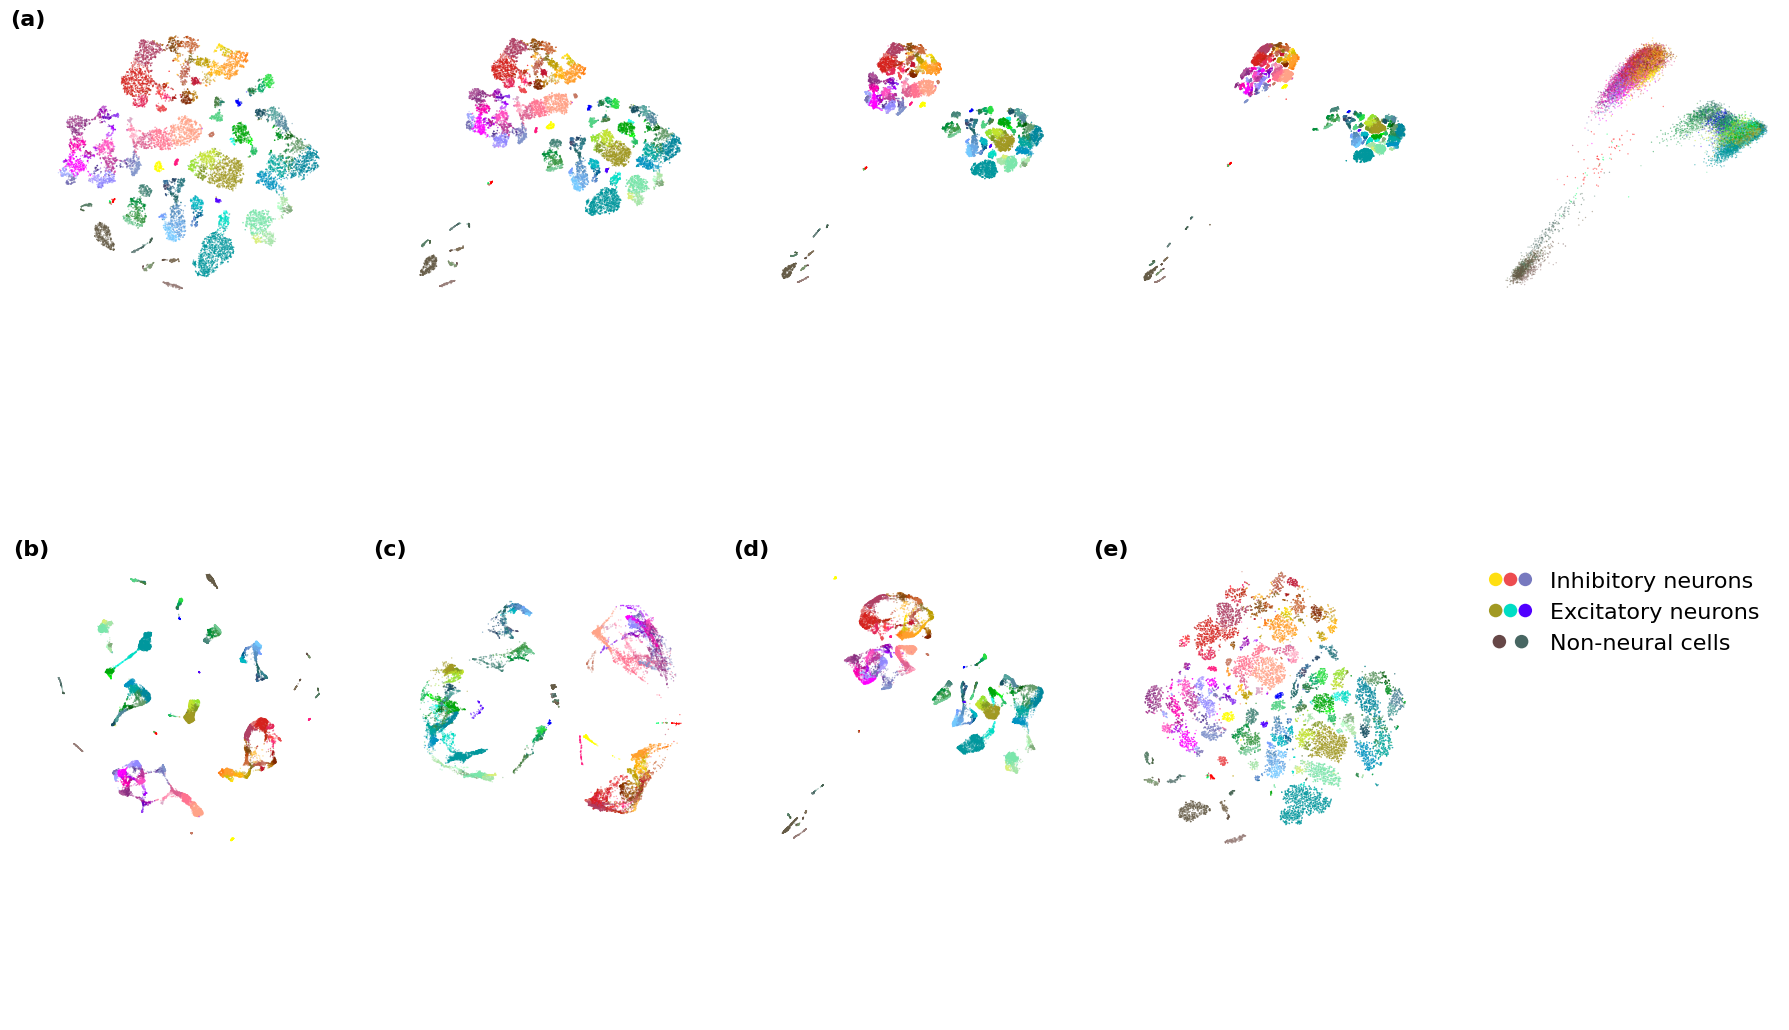

In [108]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(2, 5, figsize=(18, 12))

ax[0, 0].text(
    0.0, 1.05, "(a)",  # x, y in axes coordinates
    transform=ax[0, 0].transAxes,
    fontsize=16,
    fontweight='bold',
    va='top',
    ha='right'
)

eval_size = 14
title_size = 16
plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0,0], eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_005, tasic_dreams_005_eval, tasic_colors, ax=ax[0,1], eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=ax[0,2],  eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=ax[0,3],  eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[0,4],  eval_size=eval_size, title_size=title_size, show_eval=False)

# second row
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerBase

plot_embed(tasic_umap_emb, tasic_umap_eval, tasic_colors, ax=ax[1,0], show_eval=False)
plot_embed(tasic_phate_emb, tasic_phate_eval, tasic_colors, ax=ax[1,1], show_eval=False)
plot_embed(tasic_starmap_emb, tasic_starmap_eval, tasic_colors, ax=ax[1,2], show_eval=False)
plot_embed(tasic_mds_hybrid_emb, tasic_mds_hybrid_eval, tasic_colors, ax=ax[1,3], show_eval=False)

group_colors = [
    [col_inhib_0, col_inhib_1, col_inhib_2],
    [col_excit_0, col_excit_1, col_excit_2],
    [col_non_neural_0, col_non_neural_1]
]

ax[1,4].axis('off')


# Labels for each group
legend_labels = ['Inhibitory neurons', 'Excitatory neurons', 'Non-neural cells']

# Create dummy handles
dummy_handles = [plt.Line2D([], [], linestyle='None') for _ in group_colors]

# Custom handler that draws multiple colored circles in one legend entry
class MultiColorCircleHandler(HandlerBase):
    def __init__(self, colors, **kwargs):
        super().__init__(**kwargs)
        self.colors = colors

    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        n = len(self.colors)
        radius = height / 2.3
        spacing = width / max(n, 1)
        artists = []
        for i, c in enumerate(self.colors):
            center = (x0 + i * spacing + spacing/2, y0 + height / 2)
            circle = Circle(center, radius=radius, facecolor=c, edgecolor='none', transform=trans)
            artists.append(circle)
        return artists

# Build handler_map with actual color groups
handler_map = {
    dummy_handles[i]: MultiColorCircleHandler(group_colors[i])
    for i in range(len(group_colors))
}

# Add the custom legend
ax[1,4].legend(dummy_handles, legend_labels, handler_map=handler_map, loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1, 0.75))

descr = ["(b)", "(c)", "(d)", "(e)"]
positions = [
    (0.01, 0.4),  # ax[1, 0]
    (0.21, 0.4),  # ax[1, 1]
    (0.41, 0.4),  # ax[1, 2]
    (0.61, 0.4),  # ax[1, 3]
]

for label, (x, y) in zip(descr, positions):
    fig.text(x, y, label, fontsize=16, fontweight="bold")

plt.tight_layout()

/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none")


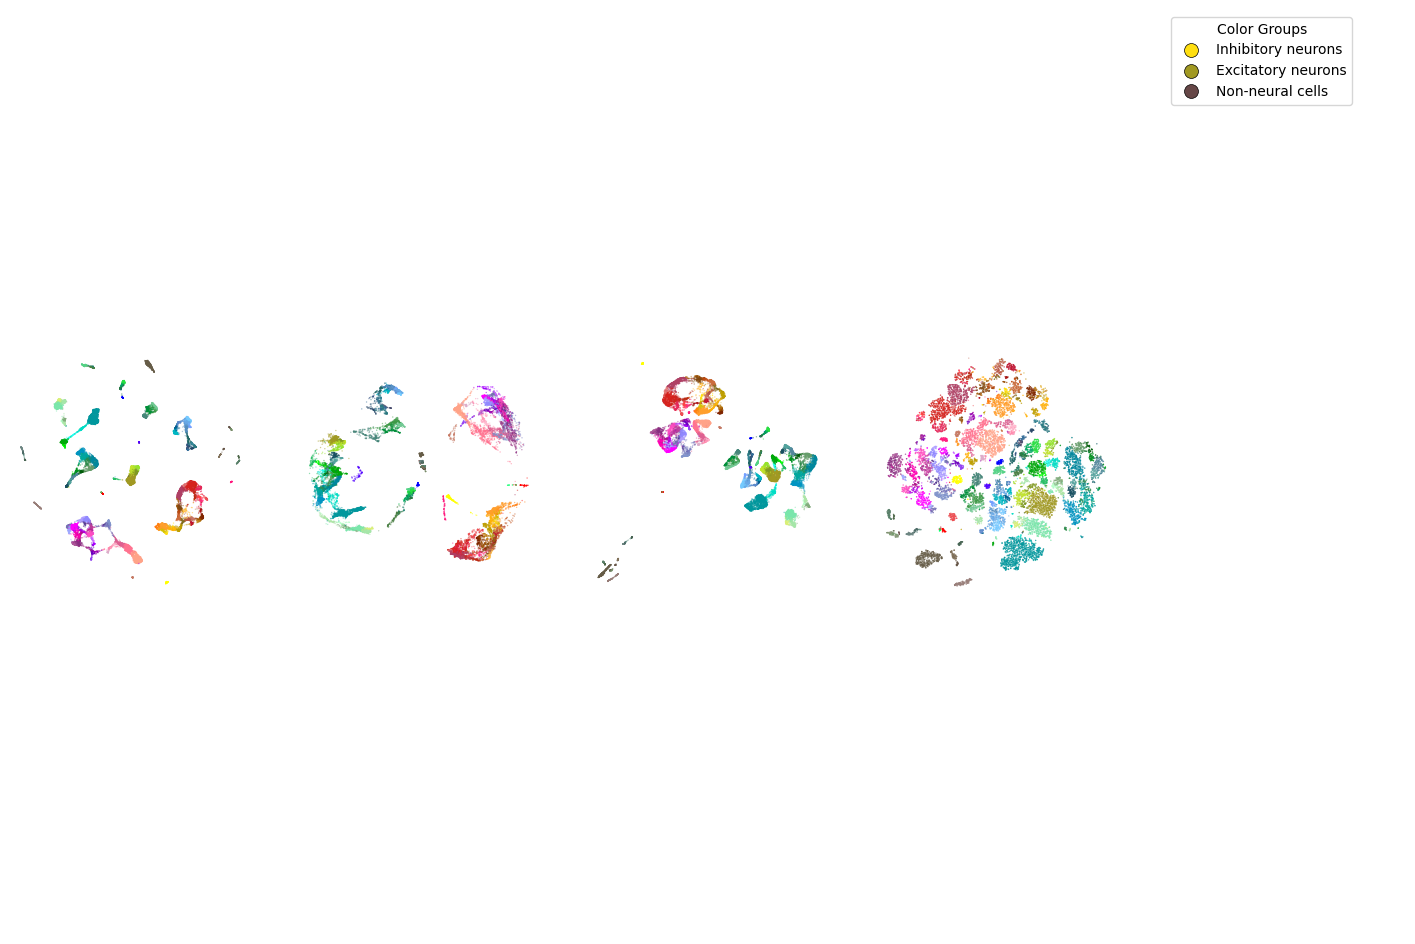

In [67]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 5, figsize=(18, 12))

plot_embed(tasic_umap_emb, tasic_umap_eval, tasic_colors, ax=ax[0], show_eval=False)
plot_embed(tasic_phate_emb, tasic_phate_eval, tasic_colors, ax=ax[1], show_eval=False)
plot_embed(tasic_starmap_emb, tasic_starmap_eval, tasic_colors, ax=ax[2], show_eval=False)
plot_embed(tasic_mds_hybrid_emb, tasic_mds_hybrid_eval, tasic_colors, ax=ax[3], show_eval=False)

ax[-1].axis('off')

group_colors = [
    [col_inhib_0, col_inhib_1, col_inhib_2],
    [col_excit_0, col_excit_1, col_excit_2],
    [col_non_neural_0, col_non_neural_1]
]
group_labels = [
    'Inhibitory neurons', 
    'Excitatory neurons', 
    'Non-neural cells'
]
handles = []
for colors, label in zip(group_colors, group_labels):
    # Create a fake Line2D with a marker (just use the first color)
    handle = Line2D(
        [0], [0], 
        marker='o', 
        color='w', 
        markerfacecolor=colors[0], 
        markersize=0,  # hide the marker, we'll emulate multiple
        label=label
    )
    handles.append(handle)

# Plot legend
legend = ax[-1].legend(handles=handles, title="Color Groups", loc="upper left")

handles = []
for colors, label in zip(group_colors, group_labels):
    handle = Line2D(
        [0], [0], 
        marker='o', 
        color='w', 
        markerfacecolor=colors[0], 
        markeredgecolor='k',
        markeredgewidth=0.5,
        markersize=10,
        label=label
    )
    handles.append(handle)

ax[-1].legend(handles=handles, title="Color Groups", loc="upper left")




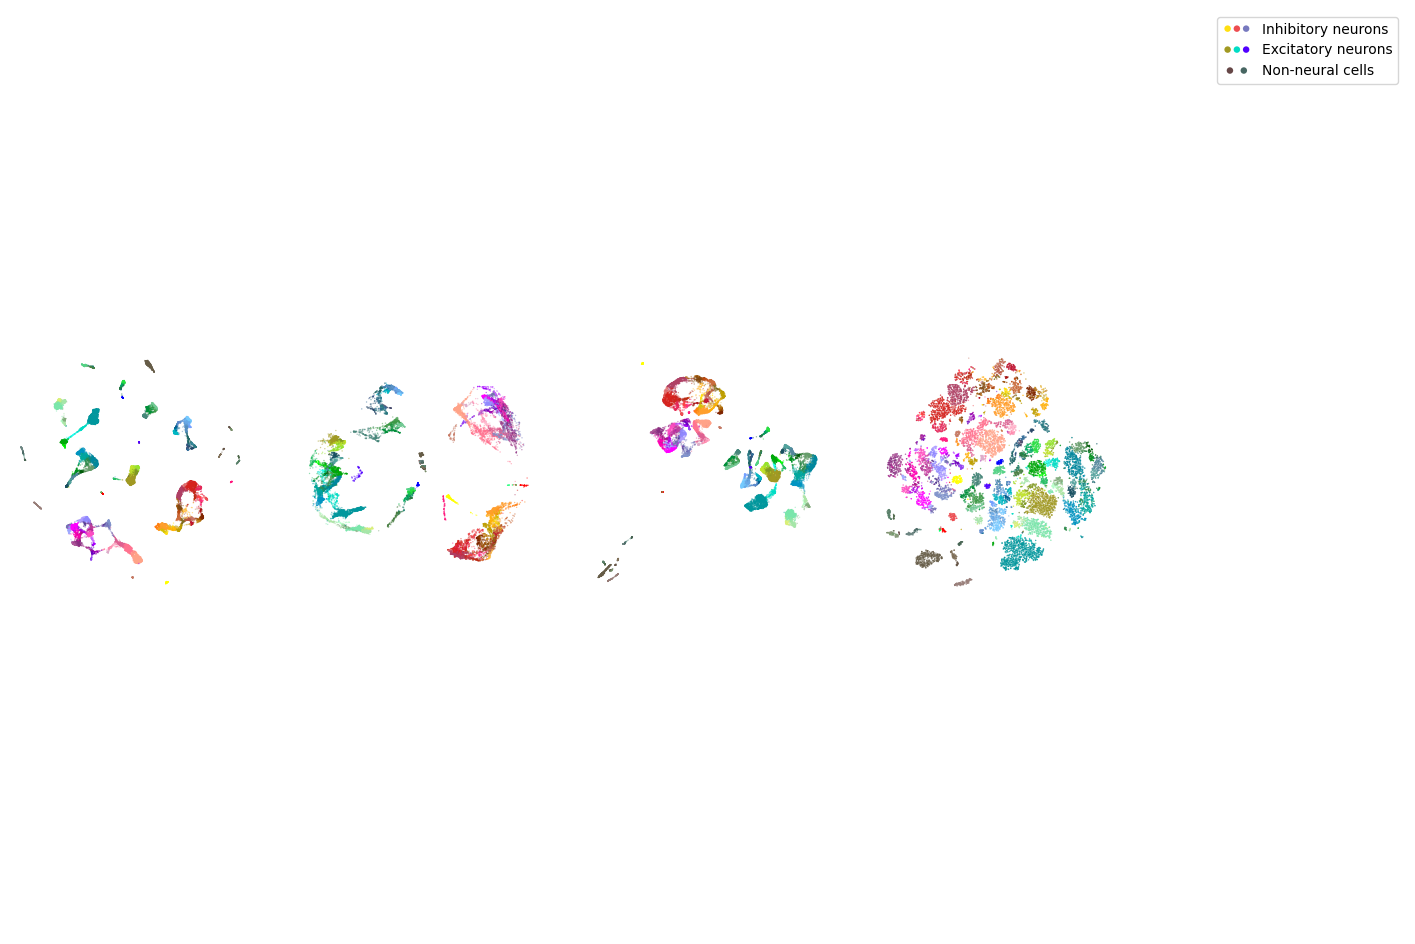

In [71]:
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerBase

fig, ax = plt.subplots(1, 5, figsize=(18, 12))

plot_embed(tasic_umap_emb, tasic_umap_eval, tasic_colors, ax=ax[0], show_eval=False)
plot_embed(tasic_phate_emb, tasic_phate_eval, tasic_colors, ax=ax[1], show_eval=False)
plot_embed(tasic_starmap_emb, tasic_starmap_eval, tasic_colors, ax=ax[2], show_eval=False)
plot_embed(tasic_mds_hybrid_emb, tasic_mds_hybrid_eval, tasic_colors, ax=ax[3], show_eval=False)

ax[-1].axis('off')


# Labels for each group
legend_labels = ['Inhibitory neurons', 'Excitatory neurons', 'Non-neural cells']

# Create dummy handles
dummy_handles = [plt.Line2D([], [], linestyle='None') for _ in group_colors]

# Custom handler that draws multiple colored circles in one legend entry
class MultiColorCircleHandler(HandlerBase):
    def __init__(self, colors, **kwargs):
        super().__init__(**kwargs)
        self.colors = colors

    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        n = len(self.colors)
        radius = height / 3
        spacing = width / max(n, 1)
        artists = []
        for i, c in enumerate(self.colors):
            center = (x0 + i * spacing + spacing/2, y0 + height / 2)
            circle = Circle(center, radius=radius, facecolor=c, edgecolor='none', transform=trans)
            artists.append(circle)
        return artists

# Build handler_map with actual color groups
handler_map = {
    dummy_handles[i]: MultiColorCircleHandler(group_colors[i])
    for i in range(len(group_colors))
}

# Add the custom legend
ax[-1].legend(dummy_handles, legend_labels, handler_map=handler_map, loc='upper right')

# # Optional: show dummy scatter points
# for color_group in group_colors:
#     for c in color_group:
#         ax.scatter([], [], c=c)

plt.show()

## fig 3

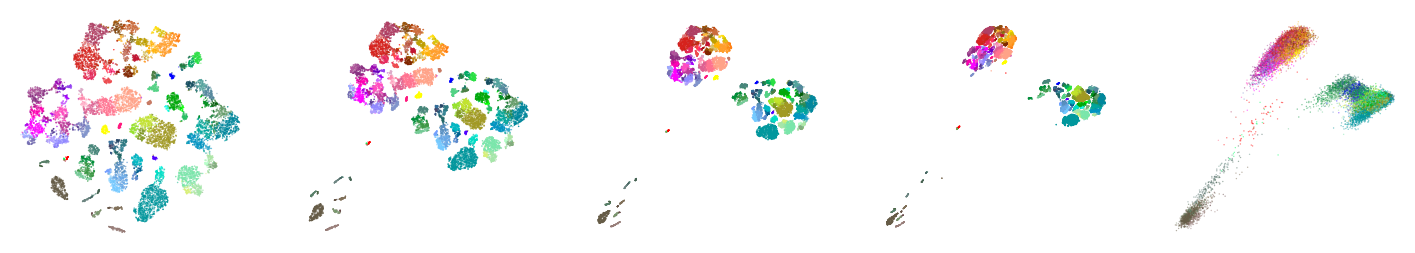

In [109]:
fig, ax = plt.subplots(1, 5, figsize=(18, 12))

eval_size = 14
title_size = 16
plot_embed(tsne_emb, tsne_eval, tasic_colors, ax=ax[0], eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_005, tasic_dreams_005_eval, tasic_colors, ax=ax[1], eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_01, tasic_dreams_01_eval, tasic_colors, ax=ax[2],  eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_dreams_02, tasic_dreams_02_eval, tasic_colors, ax=ax[3],  eval_size=eval_size, title_size=title_size, show_eval=False)
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, ax=ax[4],  eval_size=eval_size, title_size=title_size, show_eval=False)
